In [180]:
# Step 1: Data sourcing

#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import os

In [181]:
# reading data
housing_df = pd.read_csv('files/train.csv')
pd.set_option('display.max_columns', None)
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [182]:
housing_df.shape

(1460, 81)

In [183]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [184]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### step-2: Data Cleansing

In [185]:
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [186]:
# checking the percentange of missing values
housing_df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [187]:
total_missing = housing_df.isnull().sum().sort_values(ascending = False)
total_missing_perc = (housing_df.isnull().mean()*100).sort_values(ascending = False)
df_missing_values = pd.concat([total_missing,total_missing_perc], axis=1, keys=['Total_Missing_values', 'Total_Missing_Perc'])
pd.set_option('display.max_rows', None)
df_missing_values

Total_Missing_values  Total_Missing_Perc
PoolQC                         1453           99.520548
MiscFeature                    1406           96.301370
Alley                          1369           93.767123
Fence                          1179           80.753425
FireplaceQu                     690           47.260274
LotFrontage                     259           17.739726
GarageYrBlt                      81            5.547945
GarageCond                       81            5.547945
GarageType                       81            5.547945
GarageFinish                     81            5.547945
GarageQual                       81            5.547945
BsmtFinType2                     38            2.602740
BsmtExposure                     38            2.602740
BsmtQual                         37            2.534247
BsmtCond                         37            2.534247
BsmtFinType1                     37            2.534247
MasVnrArea                        8            0.547945
MasVnrType                        8            0.547945
Electrical                        1            0.068493
Id                                0            0.000000
Functional                        0            0.000000
Fireplaces                        0            0.000000
KitchenQual                       0            0.000000
KitchenAbvGr                      0            0.000000
BedroomAbvGr                      0            0.000000
HalfBath                          0            0.000000
FullBath                          0            0.000000
BsmtHalfBath                      0            0.000000
TotRmsAbvGrd                      0            0.000000
GarageCars                        0            0.000000
GrLivArea                         0            0.000000
GarageArea                        0            0.000000
PavedDrive                        0            0.000000
WoodDeckSF                        0            0.000000
OpenPorchSF                       0            0.000000
EnclosedPorch                     0            0.000000
3SsnPorch                         0            0.000000
ScreenPorch                       0            0.000000
PoolArea                          0            0.000000
MiscVal                           0            0.000000
MoSold                            0            0.000000
YrSold                            0            0.000000
SaleType                          0            0.000000
SaleCondition                     0            0.000000
BsmtFullBath                      0            0.000000
HeatingQC                         0            0.000000
LowQualFinSF                      0            0.000000
LandSlope                         0            0.000000
OverallQual                       0            0.000000
HouseStyle                        0            0.000000
BldgType                          0            0.000000
Condition2                        0            0.000000
Condition1                        0            0.000000
Neighborhood                      0            0.000000
LotConfig                         0            0.000000
YearBuilt                         0            0.000000
Utilities                         0            0.000000
LandContour                       0            0.000000
LotShape                          0            0.000000
Street                            0            0.000000
LotArea                           0            0.000000
MSZoning                          0            0.000000
OverallCond                       0            0.000000
YearRemodAdd                      0            0.000000
2ndFlrSF                          0            0.000000
BsmtFinSF2                        0            0.000000
1stFlrSF                          0            0.000000
CentralAir                        0            0.000000
MSSubClass                        0            0.000000
Heating                           0            0.000000
TotalBsmtSF                       0    

In [188]:
# removing columns whose percentange is greater than 45%
housing_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace=True)
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [189]:
housing_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [190]:
# filling the missing values that are less than 45%
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [191]:
housing_df['LotFrontage'].isnull().sum()

0

In [192]:
housing_df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [193]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mean())

In [194]:
housing_df['GarageYrBlt'].isnull().sum()

0

In [195]:
housing_df['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [196]:
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median())

In [197]:
housing_df['MasVnrArea'].isnull().sum()

0

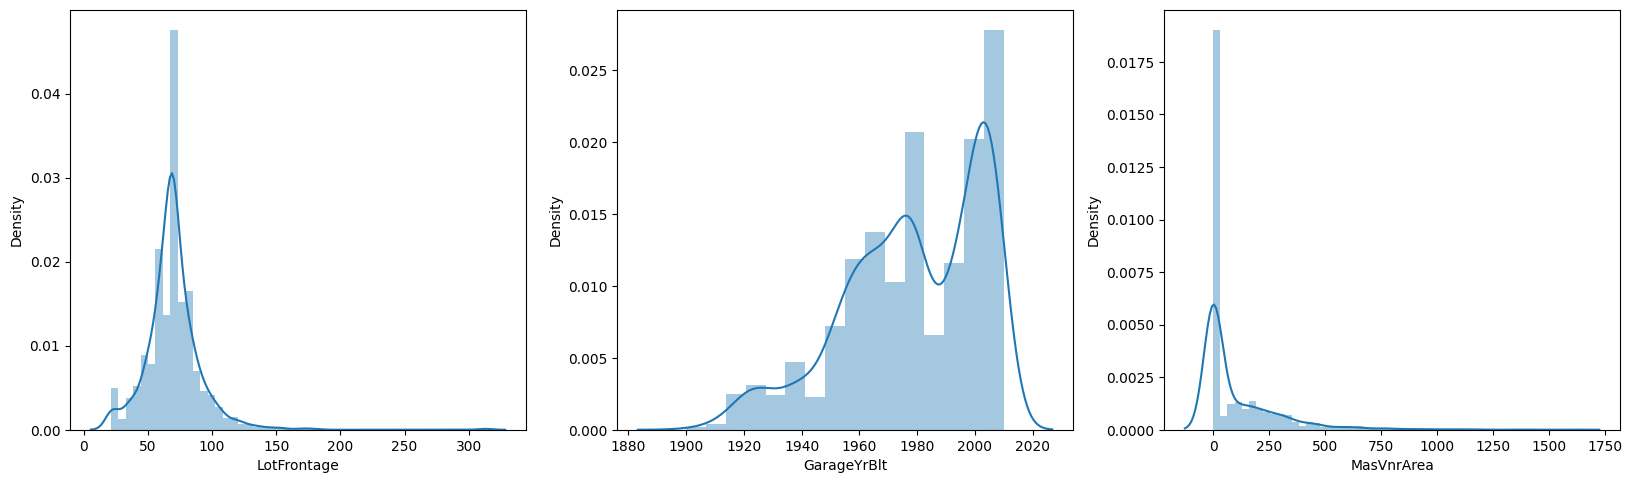

In [198]:
# let us visualize the missing values columns
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.distplot(housing_df['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(housing_df['GarageYrBlt'])
plt.subplot(2,3,3)
sns.distplot(housing_df['MasVnrArea'])
plt.show()

In [199]:
df_missing_values = df_missing_values[df_missing_values['Total_Missing_Perc'] < 45]
df_missing_values

Total_Missing_values  Total_Missing_Perc
LotFrontage                     259           17.739726
GarageYrBlt                      81            5.547945
GarageCond                       81            5.547945
GarageType                       81            5.547945
GarageFinish                     81            5.547945
GarageQual                       81            5.547945
BsmtFinType2                     38            2.602740
BsmtExposure                     38            2.602740
BsmtQual                         37            2.534247
BsmtCond                         37            2.534247
BsmtFinType1                     37            2.534247
MasVnrArea                        8            0.547945
MasVnrType                        8            0.547945
Electrical                        1            0.068493
Id                                0            0.000000
Functional                        0            0.000000
Fireplaces                        0            0.000000
KitchenQual                       0            0.000000
KitchenAbvGr                      0            0.000000
BedroomAbvGr                      0            0.000000
HalfBath                          0            0.000000
FullBath                          0            0.000000
BsmtHalfBath                      0            0.000000
TotRmsAbvGrd                      0            0.000000
GarageCars                        0            0.000000
GrLivArea                         0            0.000000
GarageArea                        0            0.000000
PavedDrive                        0            0.000000
WoodDeckSF                        0            0.000000
OpenPorchSF                       0            0.000000
EnclosedPorch                     0            0.000000
3SsnPorch                         0            0.000000
ScreenPorch                       0            0.000000
PoolArea                          0            0.000000
MiscVal                           0            0.000000
MoSold                            0            0.000000
YrSold                            0            0.000000
SaleType                          0            0.000000
SaleCondition                     0            0.000000
BsmtFullBath                      0            0.000000
HeatingQC                         0            0.000000
LowQualFinSF                      0            0.000000
LandSlope                         0            0.000000
OverallQual                       0            0.000000
HouseStyle                        0            0.000000
BldgType                          0            0.000000
Condition2                        0            0.000000
Condition1                        0            0.000000
Neighborhood                      0            0.000000
LotConfig                         0            0.000000
YearBuilt                         0            0.000000
Utilities                         0            0.000000
LandContour                       0            0.000000
LotShape                          0            0.000000
Street                            0            0.000000
LotArea                           0            0.000000
MSZoning                          0            0.000000
OverallCond                       0            0.000000
YearRemodAdd                      0            0.000000
2ndFlrSF                          0            0.000000
BsmtFinSF2                        0            0.000000
1stFlrSF                          0            0.000000
CentralAir                        0            0.000000
MSSubClass                        0            0.000000
Heating                           0            0.000000
TotalBsmtSF                       0            0.000000
BsmtUnfSF                         0            0.000000
BsmtFinSF1                        0            0.000000
RoofStyle                         0            0.000000
Foundation                        0            0.000000
ExterCond                         0    

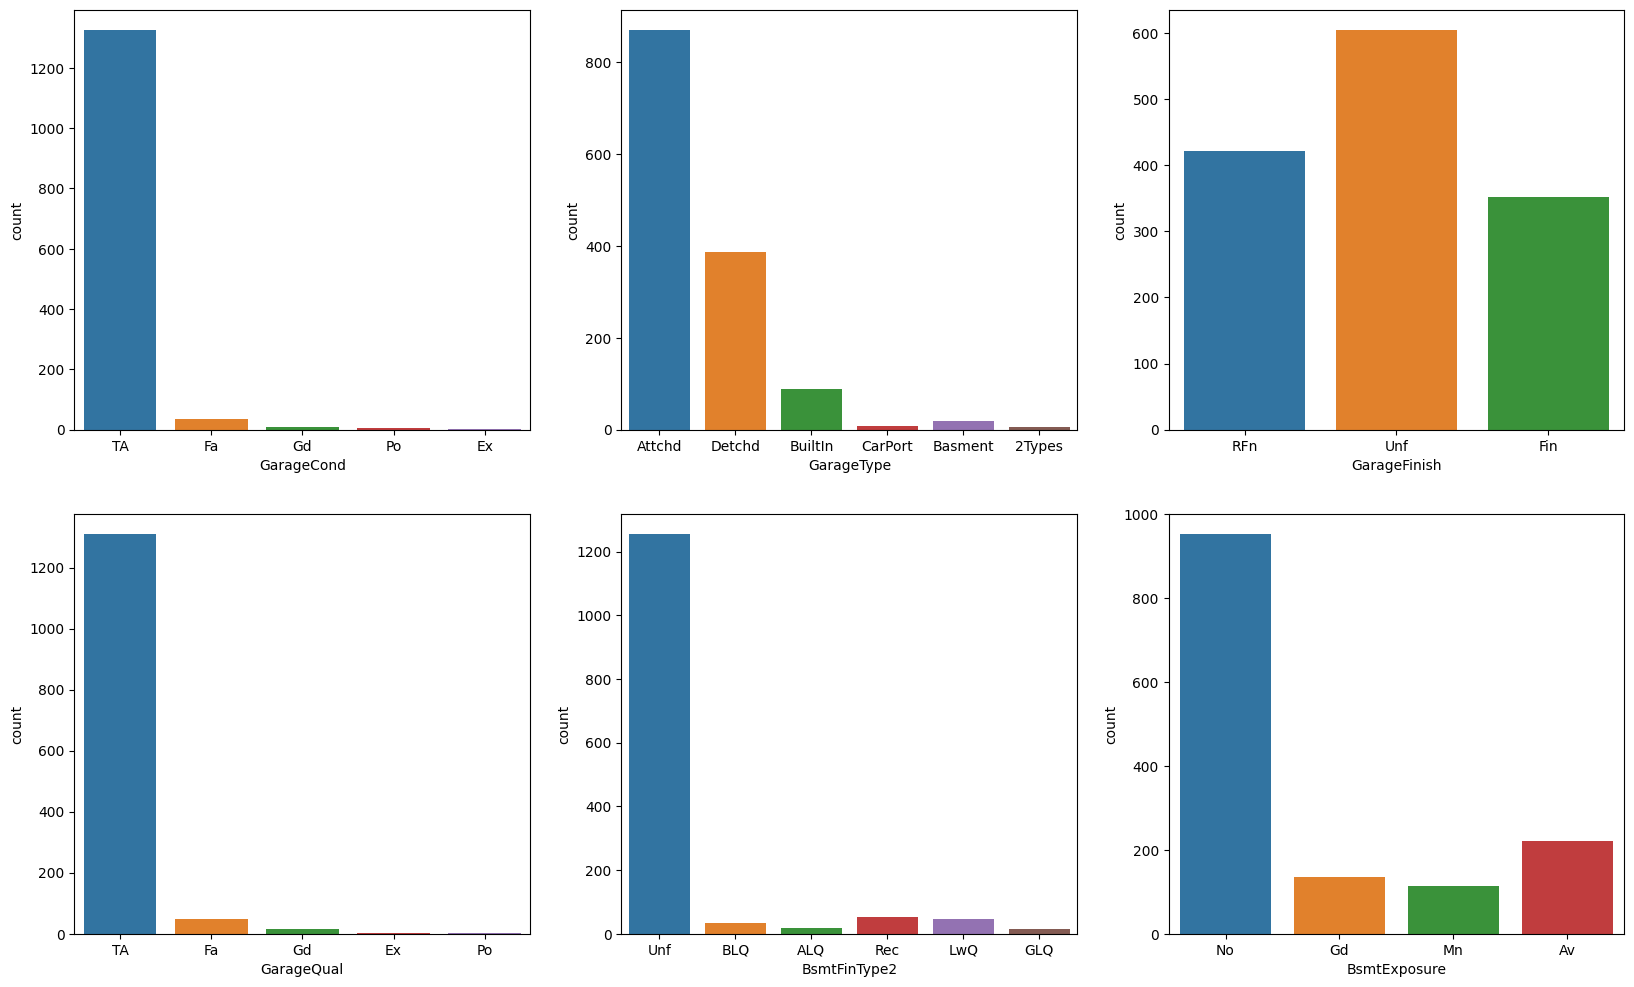

In [200]:
# let us visualize other missing values
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='GarageCond', data=housing_df)
plt.subplot(2,3,2)
sns.countplot(x='GarageType', data=housing_df)
plt.subplot(2,3,3)
sns.countplot(x='GarageFinish',data=housing_df )
plt.subplot(2,3,4)
sns.countplot(x='GarageQual', data=housing_df)
plt.subplot(2,3,5)
sns.countplot(x='BsmtFinType2', data=housing_df)
plt.subplot(2,3,6)
sns.countplot(x='BsmtExposure', data=housing_df)
plt.show()

In [201]:
# replacing nan with 'No garage'
housing_df['GarageCond'] = housing_df['GarageCond'].replace(np.nan, 'No Garage')
housing_df['GarageType'] = housing_df['GarageType'].replace(np.nan, 'No Garage')
housing_df['GarageFinish'] = housing_df['GarageFinish'].replace(np.nan,'No Garage')
housing_df['GarageQual'] = housing_df['GarageQual'].replace(np.nan,'No Garage')

In [202]:
# replacing nan with top occuring value
housing_df['MasVnrType'] = housing_df['MasVnrType'].replace(np.nan, 'None')
housing_df['Electrical'] = housing_df['Electrical'].replace(np.nan, 'SBrkr')

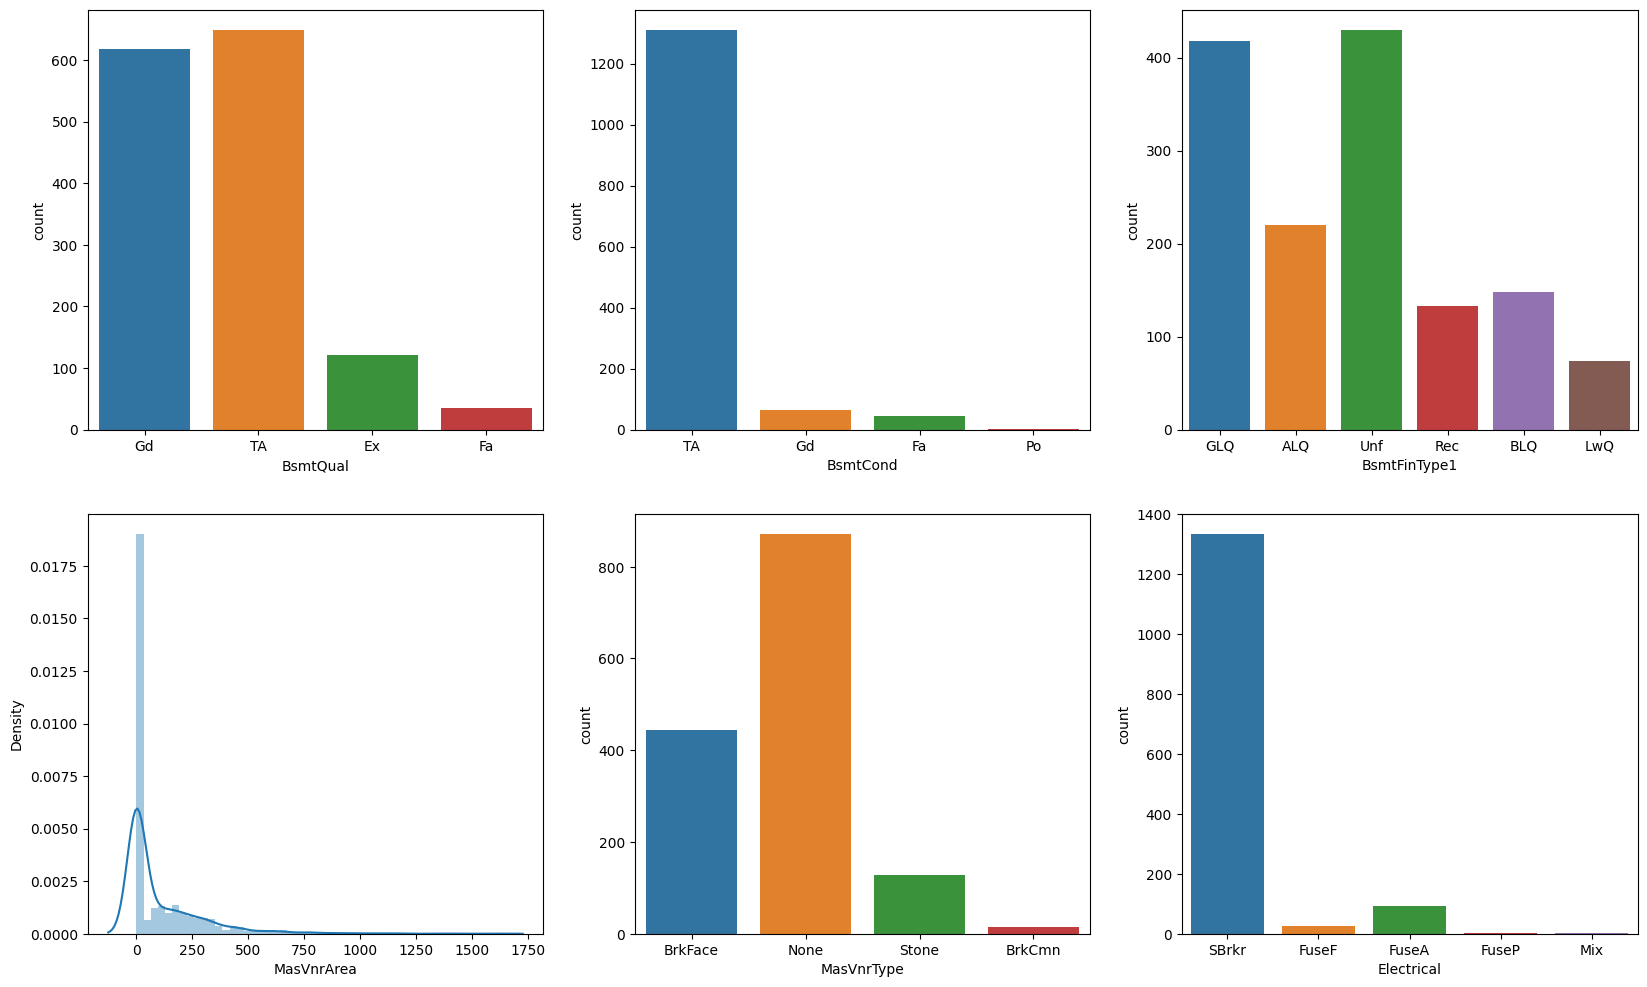

In [203]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='BsmtQual', data=housing_df)
plt.subplot(2,3,2)
sns.countplot(x='BsmtCond', data=housing_df)
plt.subplot(2,3,3)
sns.countplot(x='BsmtFinType1', data=housing_df)
plt.subplot(2,3,4)
sns.distplot(housing_df['MasVnrArea'])
plt.subplot(2,3,5)
sns.countplot(x='MasVnrType', data=housing_df)
plt.subplot(2,3,6)
sns.countplot(x='Electrical', data=housing_df)
plt.show()

In [204]:
# replacing null value in basements columns
housing_df['BsmtQual'] = housing_df['BsmtQual'].replace(np.nan,'No Basement')
housing_df['BsmtCond'] = housing_df['BsmtCond'].replace(np.nan,'No Basement')
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].replace(np.nan,'No Basement')
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].replace(np.nan,'No Basement')
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].replace(np.nan,'No Basement')

In [205]:
housing_df.isnull().mean()*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [206]:
# we can see that there are no null values, hence the data is  cleaned

In [207]:
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [208]:
# Now changing the numerical to categorical for dummy variables
housing_df['MSSubClass'] = housing_df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
housing_df['OverallQual'] = housing_df['OverallQual'].replace({10:'Very Excellent',9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing_df['OverallCond'] = housing_df['OverallCond'].replace({10:'Very Excellent',9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [209]:
housing_df.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          G

In [210]:
# checking the dependent variable 'salePrice'
housing_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

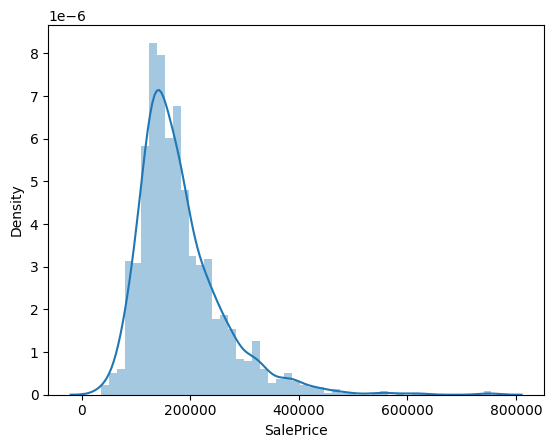

In [211]:
sns.distplot(housing_df['SalePrice'])

In [212]:
# it is skewed let us transform to normal
housing_df['SalePrice'] = np.log(housing_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

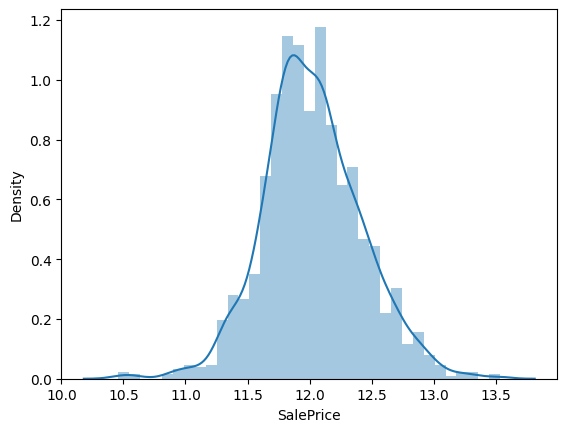

In [213]:
sns.distplot(housing_df['SalePrice'])

In [214]:
# we can see normal distibution

### Step-3 : EDA

In [215]:
housing_df.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          G

In [216]:
# we can remove 'id' as well as it is just an index
housing_df.drop(columns=['Id'], inplace=True)
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     At

In [217]:
# visualizing categorical varibles
# get categorical columns
categorical_columns = housing_df.select_dtypes(include=['object'])
categorical = categorical_columns.columns
categorical

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

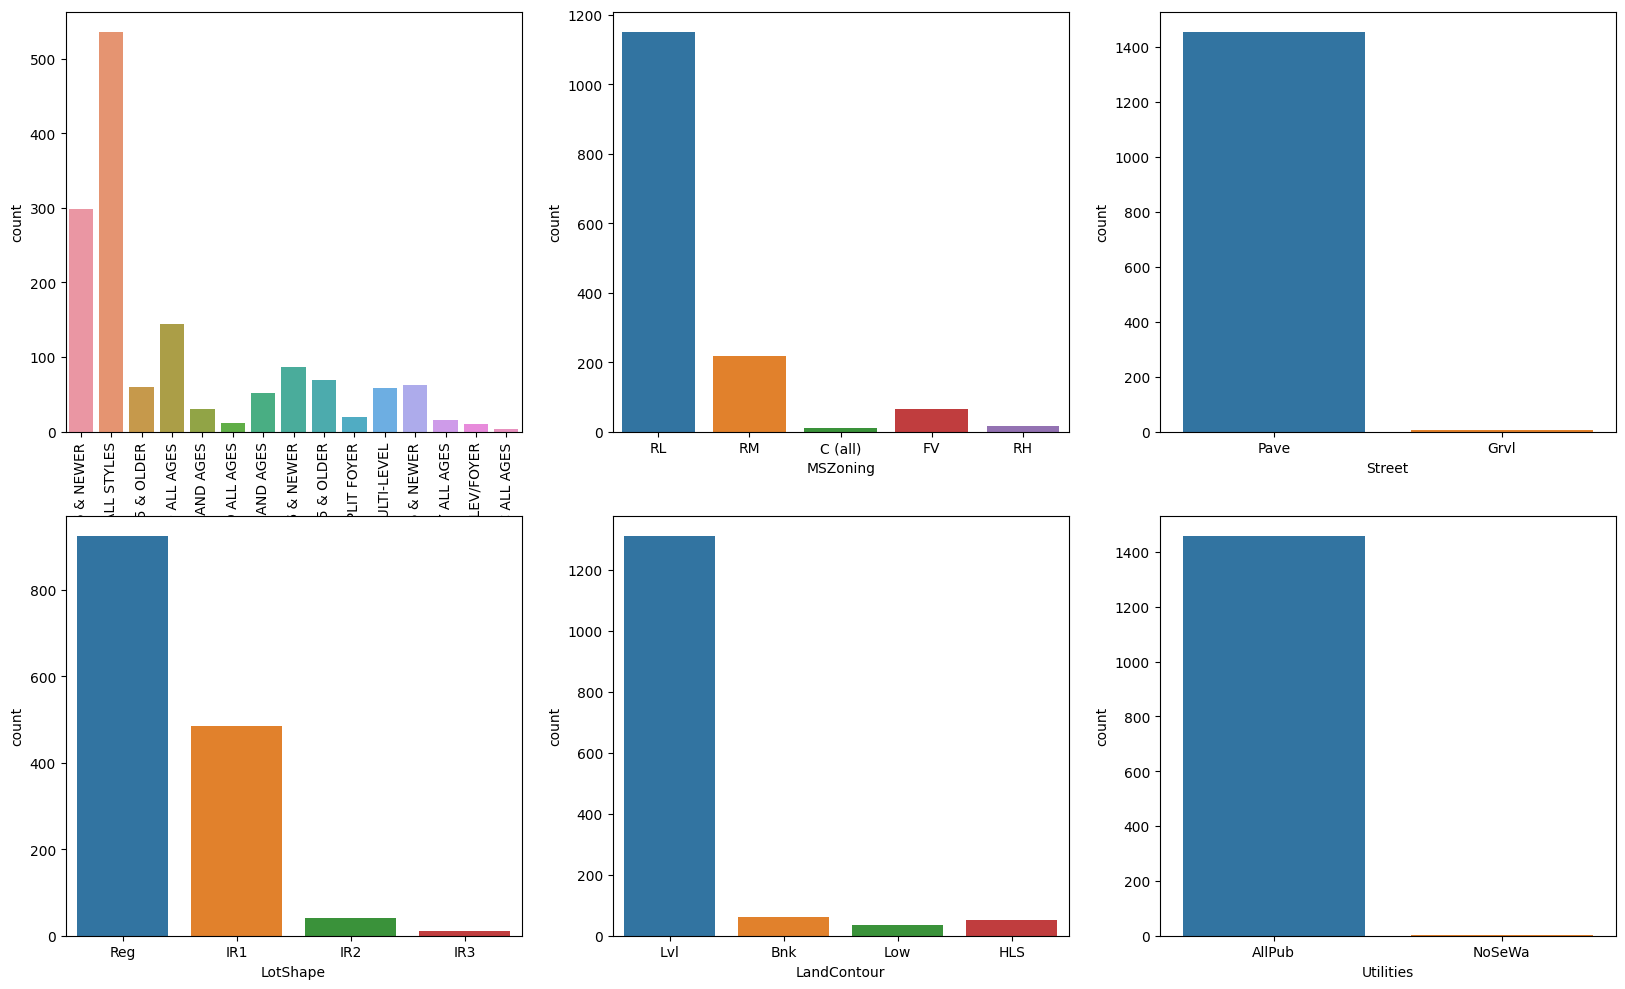

In [218]:
# univariate analysis
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='MSSubClass',data=housing_df)
plt.xticks(rotation=90) # to rotate x-axis label to 90degrees
plt.subplot(2,3,2)
sns.countplot(x='MSZoning',data=housing_df)
plt.subplot(2,3,3)
sns.countplot(x='Street',data=housing_df)
plt.subplot(2,3,4)
sns.countplot(x='LotShape',data=housing_df)
plt.subplot(2,3,5)
sns.countplot(x='LandContour',data=housing_df)
plt.subplot(2,3,6)
sns.countplot(x='Utilities',data=housing_df)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2-STORY 1946 & NEWER'),
  Text(1, 0, '1-STORY 1946 & NEWER ALL STYLES'),
  Text(2, 0, '2-STORY 1945 & OLDER'),
  Text(3, 0, '1-1/2 STORY FINISHED ALL AGES'),
  Text(4, 0, '2 FAMILY CONVERSION - ALL STYLES AND AGES'),
  Text(5, 0, '1-1/2 STORY - UNFINISHED ALL AGES'),
  Text(6, 0, 'DUPLEX - ALL STYLES AND AGES'),
  Text(7, 0, '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'),
  Text(8, 0, '1-STORY 1945 & OLDER'),
  Text(9, 0, 'SPLIT FOYER'),
  Text(10, 0, 'SPLIT OR MULTI-LEVEL'),
  Text(11, 0, '2-STORY PUD - 1946 & NEWER'),
  Text(12, 0, '2-1/2 STORY ALL AGES'),
  Text(13, 0, 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'),
  Text(14, 0, '1-STORY W/FINISHED ATTIC ALL AGES')])

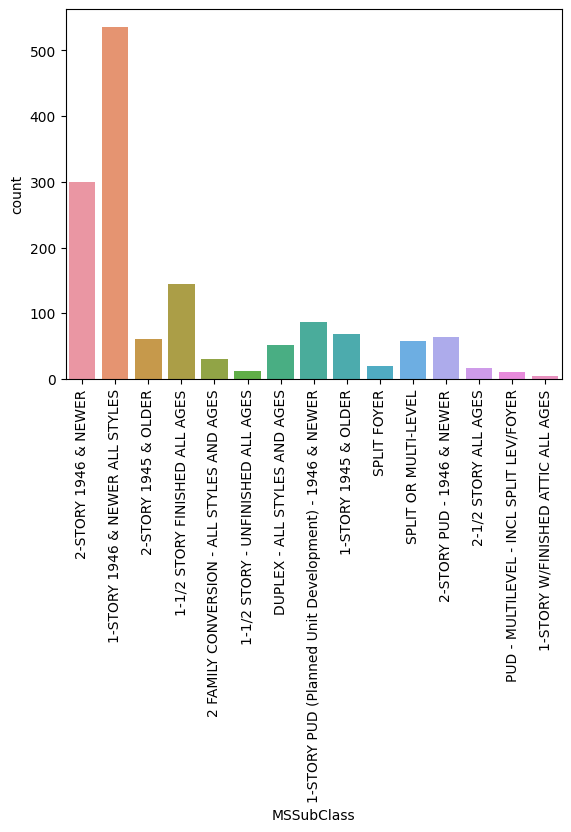

In [219]:
sns.countplot(x='MSSubClass',data=housing_df)
plt.xticks(rotation=90)

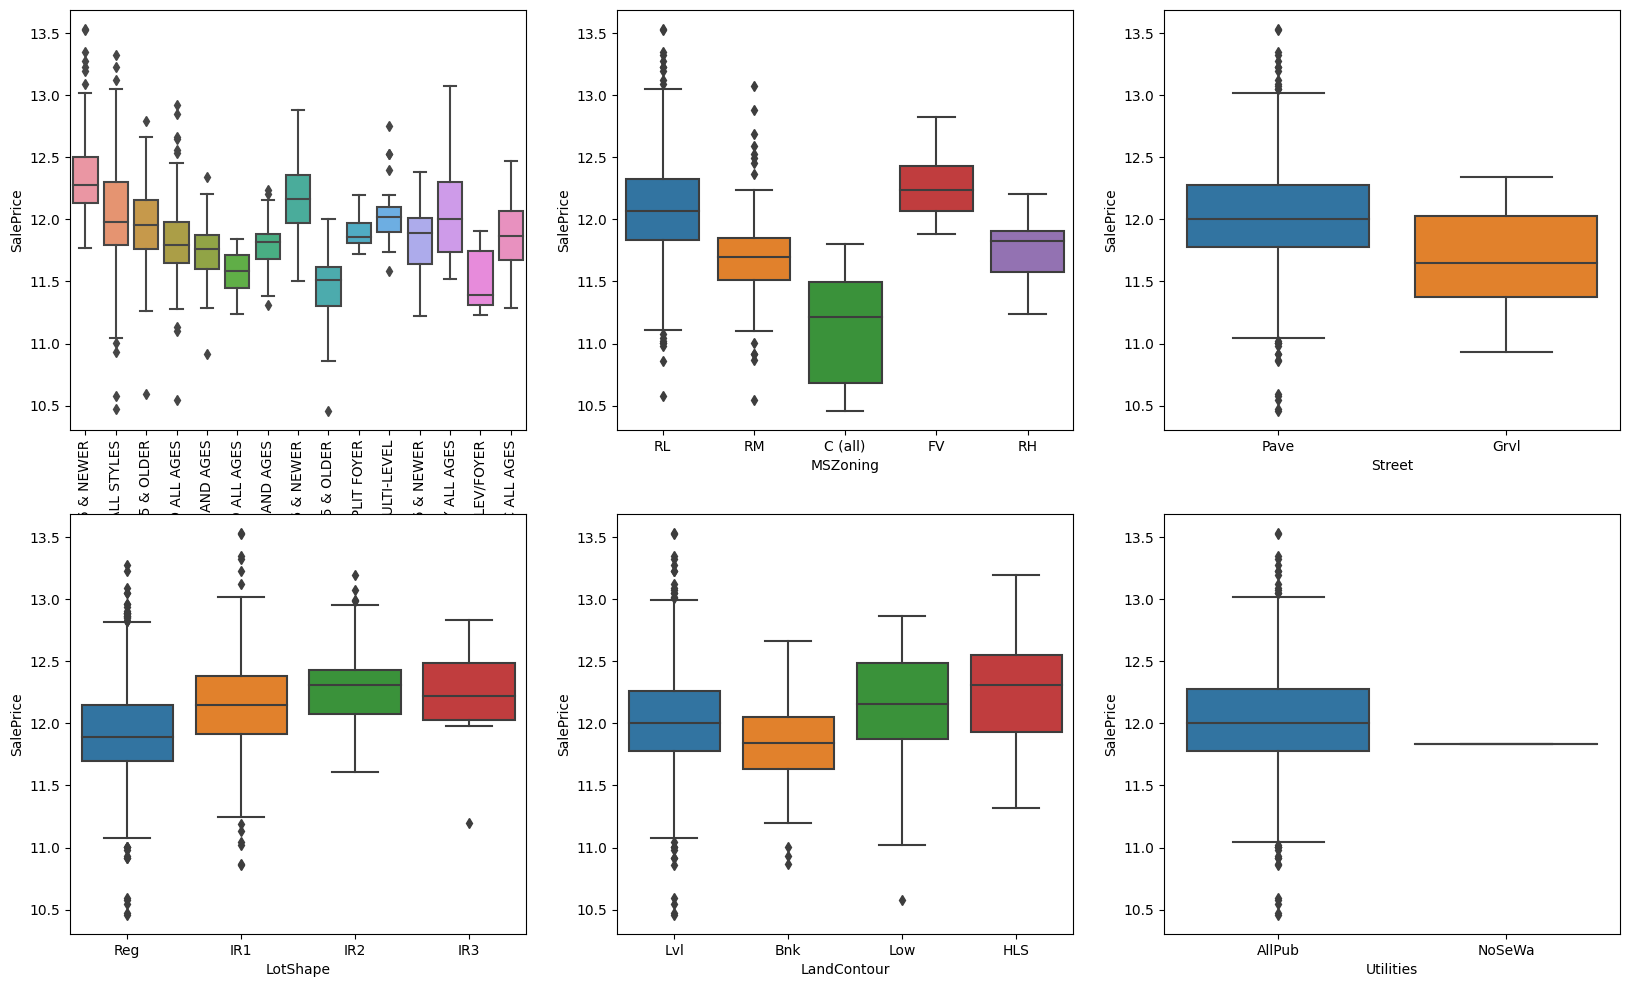

In [220]:
# bivariate analysis
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='MSSubClass',y='SalePrice',data=housing_df)
plt.xticks(rotation=90) # to rotate x-axis label to 90degrees
plt.subplot(2,3,2)
sns.boxplot(x='MSZoning',y='SalePrice', data=housing_df)
plt.subplot(2,3,3)
sns.boxplot(x='Street',y='SalePrice',data=housing_df)
plt.subplot(2,3,4)
sns.boxplot(x='LotShape',y='SalePrice',data=housing_df)
plt.subplot(2,3,5)
sns.boxplot(x='LandContour',y='SalePrice',data=housing_df)
plt.subplot(2,3,6)
sns.boxplot(x='Utilities',y='SalePrice',data=housing_df)
plt.show()

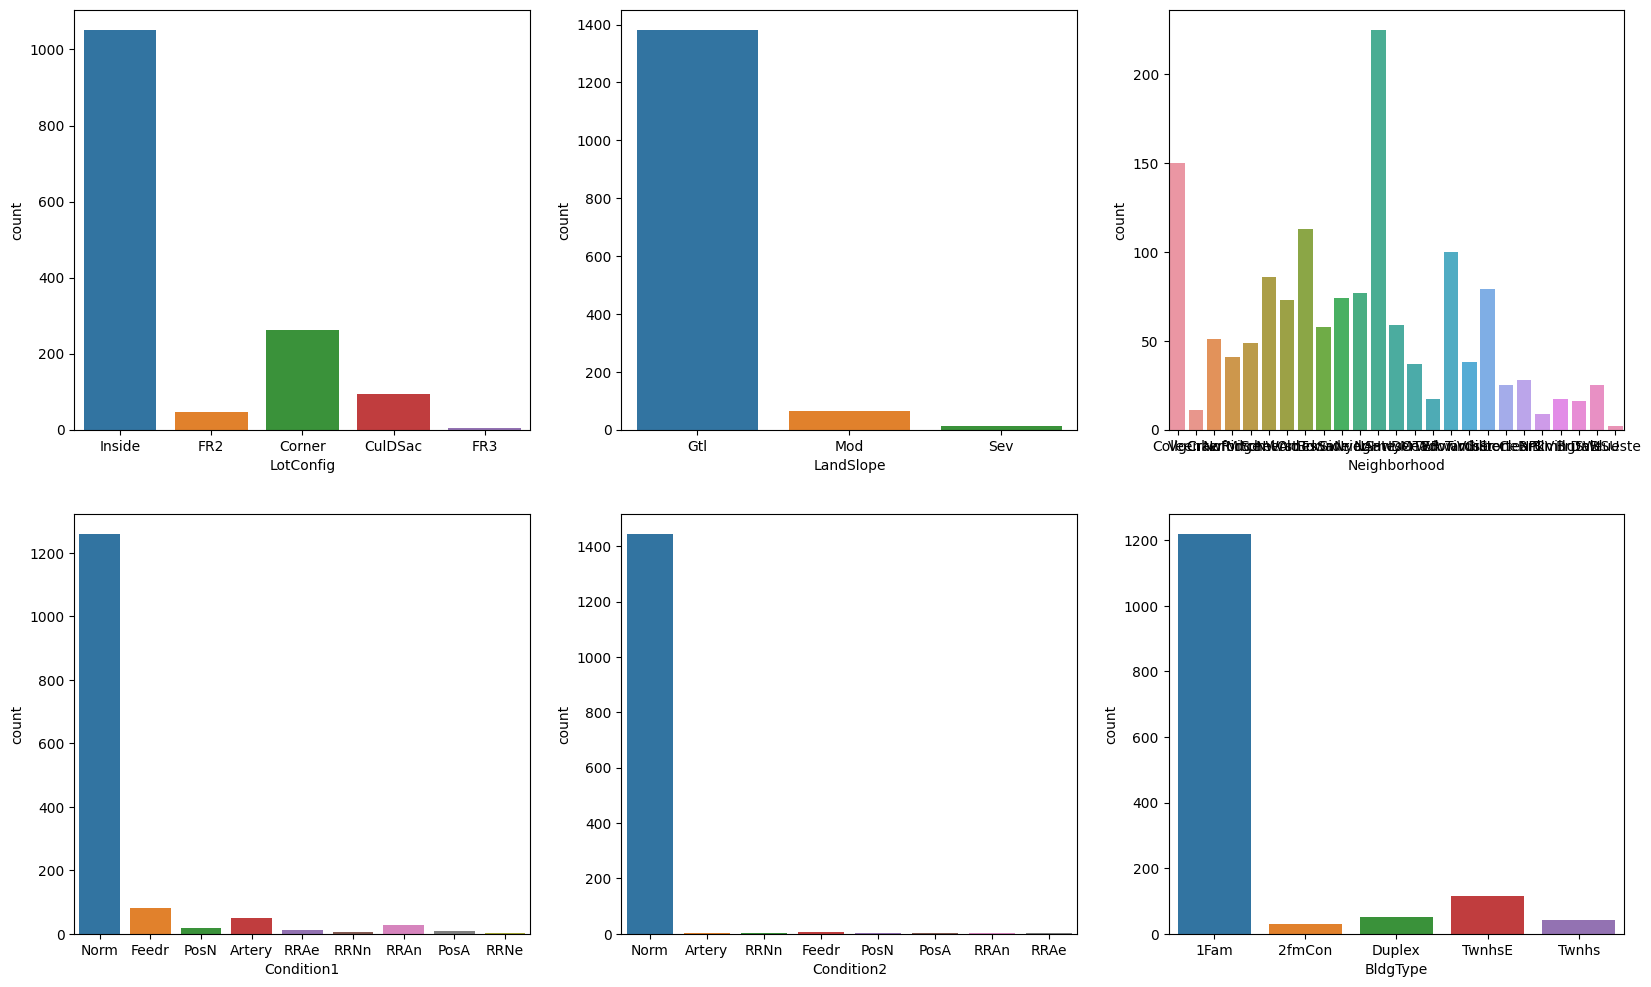

In [221]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='LotConfig',data=housing_df)
plt.subplot(2,3,2)
sns.countplot(x='LandSlope',data=housing_df)
plt.subplot(2,3,3)
sns.countplot(x='Neighborhood',data=housing_df)
plt.subplot(2,3,4)
sns.countplot(x='Condition1',data=housing_df)
plt.subplot(2,3,5)
sns.countplot(x='Condition2',data=housing_df)
plt.subplot(2,3,6)
sns.countplot(x='BldgType',data=housing_df)
plt.show()

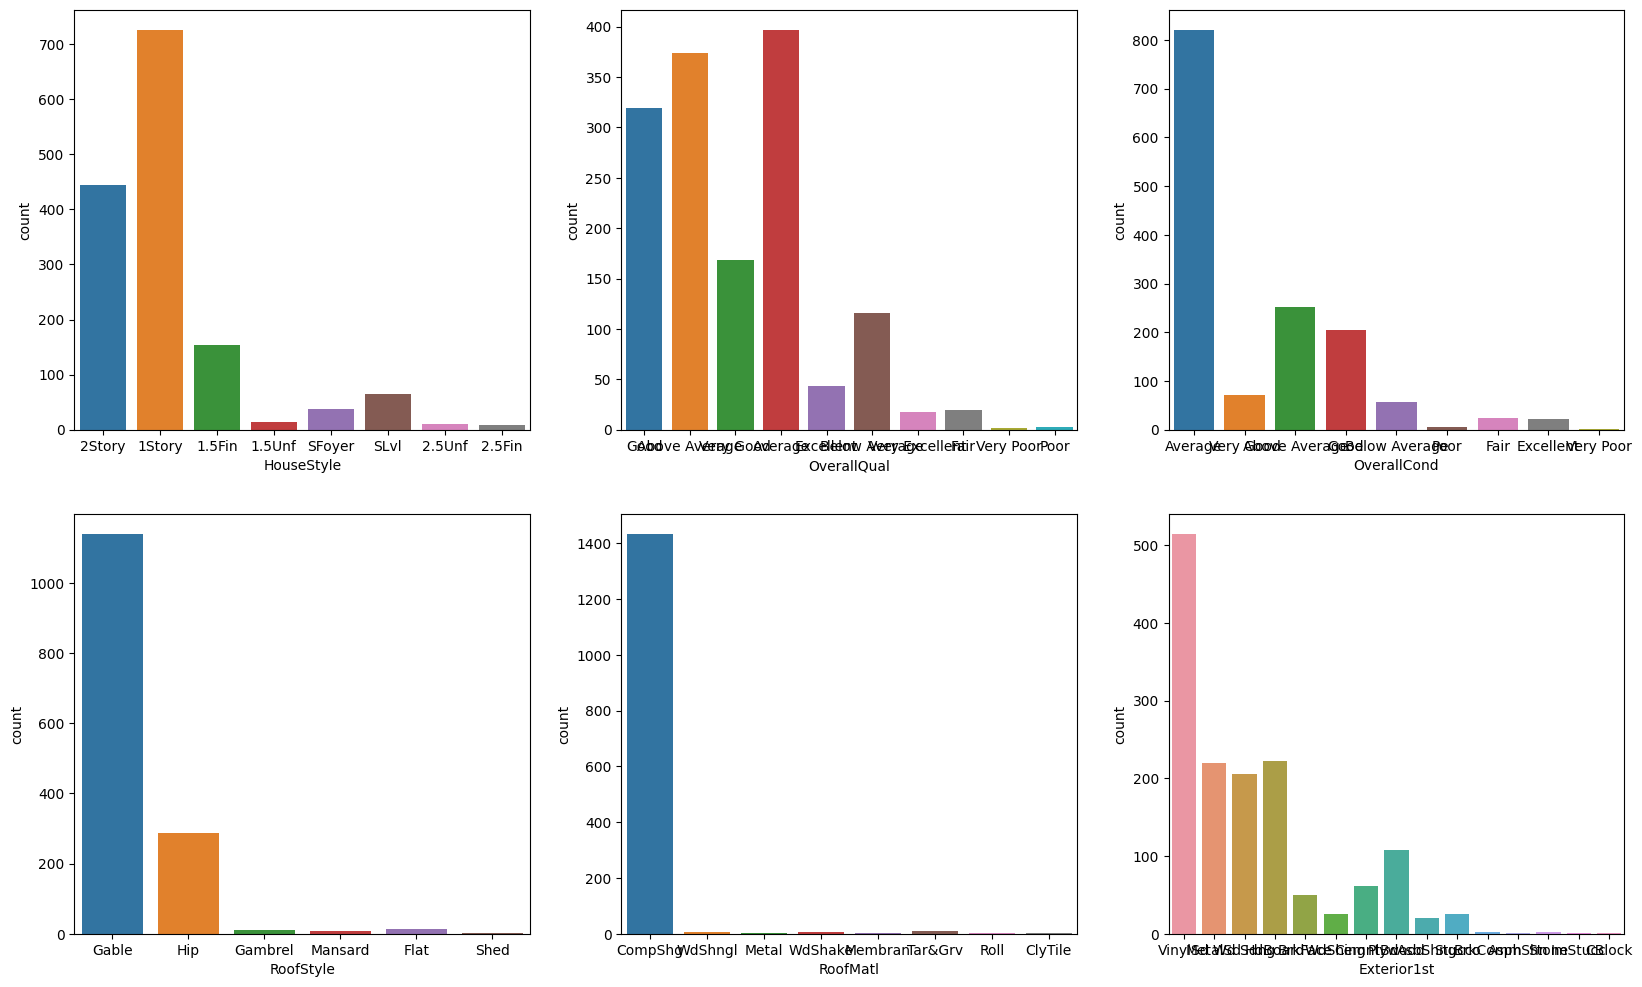

In [222]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='HouseStyle',data=housing_df)
plt.subplot(2,3,2)
sns.countplot(x='OverallQual',data=housing_df)
plt.subplot(2,3,3)
sns.countplot(x='OverallCond',data=housing_df)
plt.subplot(2,3,4)
sns.countplot(x='RoofStyle',data=housing_df)
plt.subplot(2,3,5)
sns.countplot(x='RoofMatl',data=housing_df)
plt.subplot(2,3,6)
sns.countplot(x='Exterior1st',data=housing_df)
plt.show()

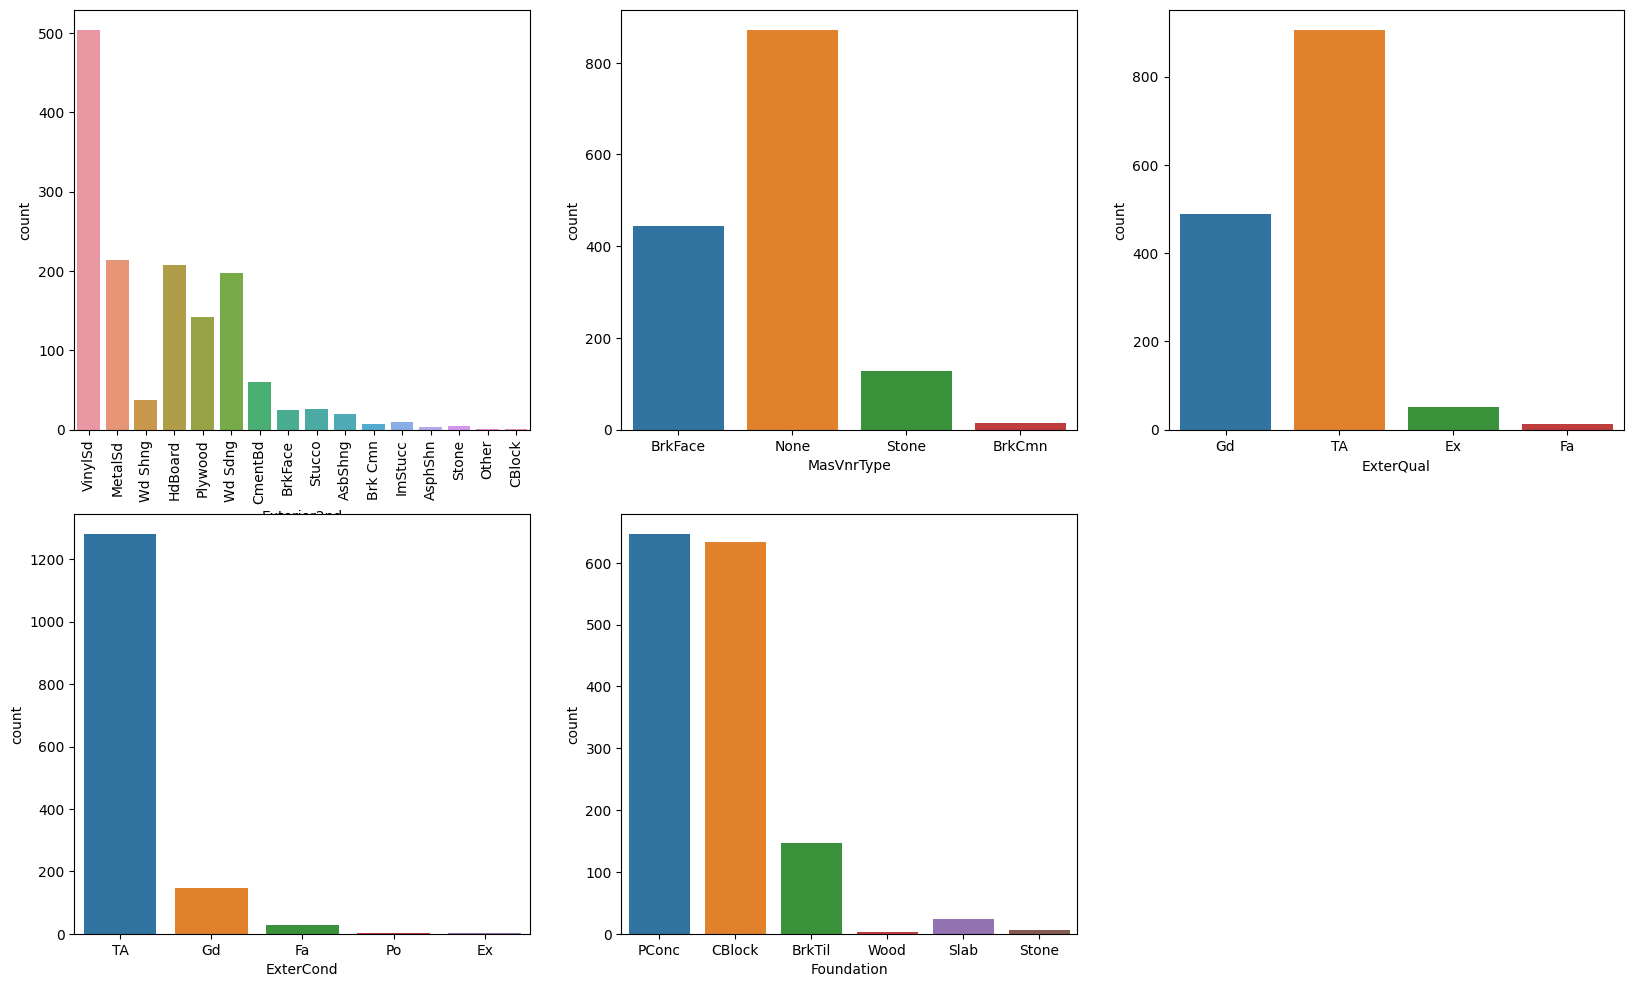

In [223]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='Exterior2nd',data=housing_df)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x='MasVnrType',data=housing_df)
plt.subplot(2,3,3)
sns.countplot(x='ExterQual',data=housing_df)
plt.subplot(2,3,4)
sns.countplot(x='ExterCond',data=housing_df)
plt.subplot(2,3,5)
sns.countplot(x='Foundation',data=housing_df)
plt.show()

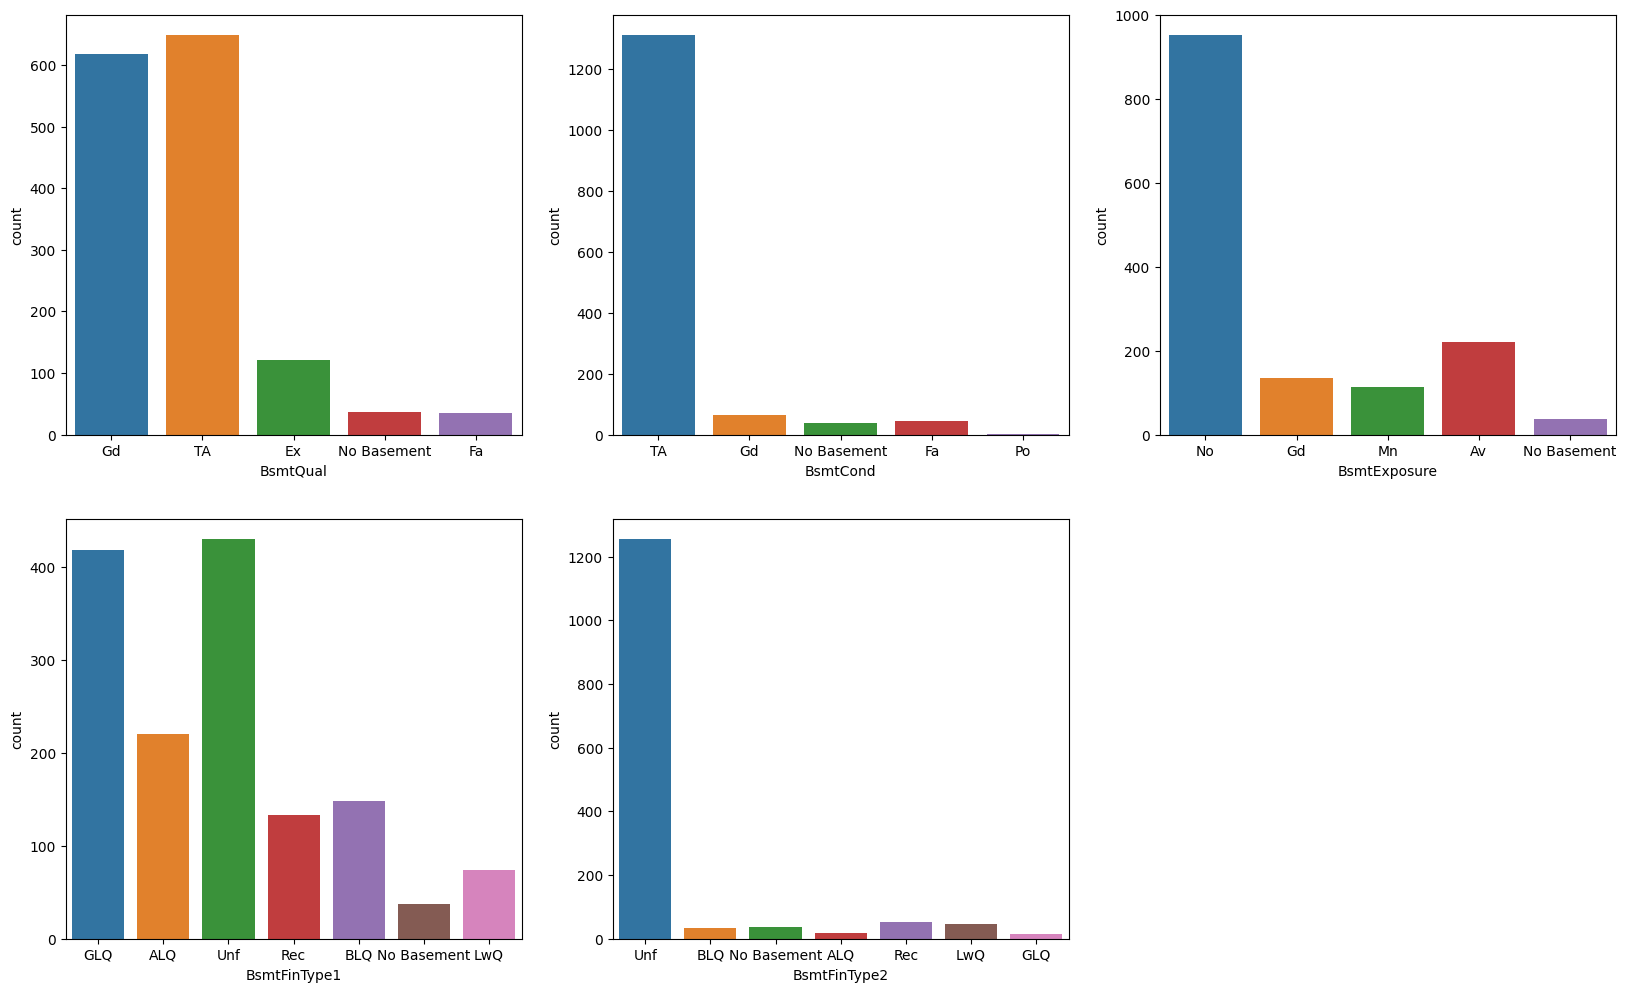

In [224]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='BsmtQual',data=housing_df)
plt.subplot(2,3,2)
sns.countplot(x='BsmtCond',data=housing_df)
plt.subplot(2,3,3)
sns.countplot(x='BsmtExposure',data=housing_df)
plt.subplot(2,3,4)
sns.countplot(x='BsmtFinType1',data=housing_df)
plt.subplot(2,3,5)
sns.countplot(x='BsmtFinType2',data=housing_df)
plt.show()  

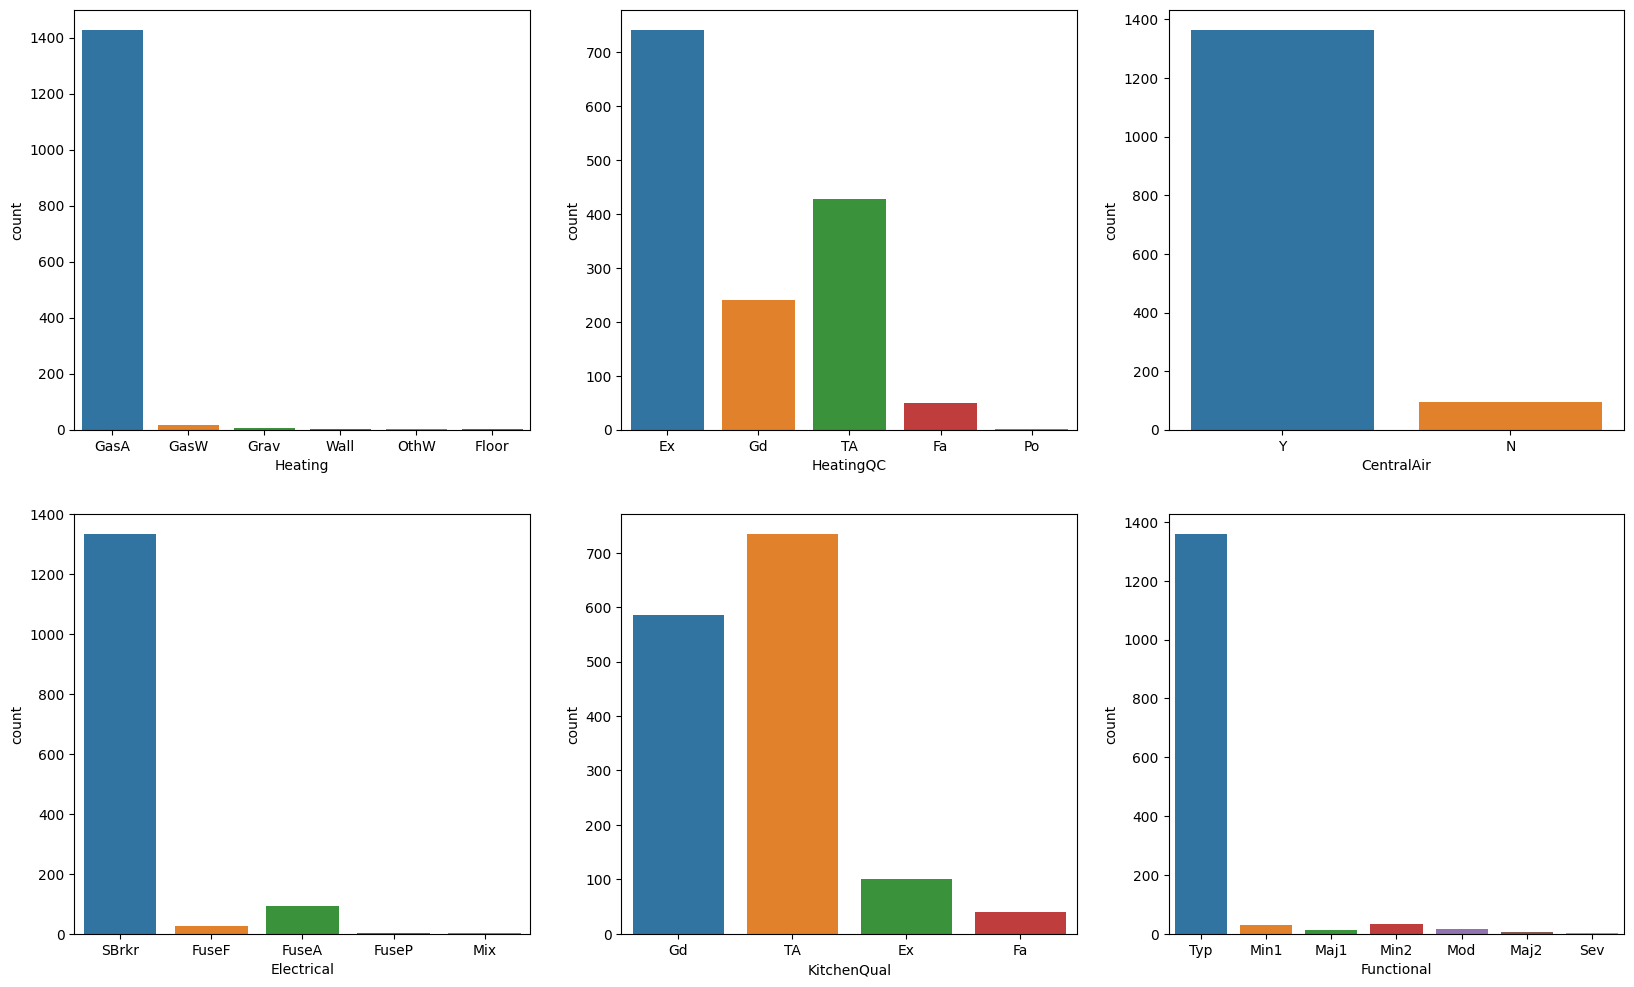

In [225]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='Heating',data=housing_df)
plt.subplot(2,3,2)
sns.countplot(x='HeatingQC',data=housing_df)
plt.subplot(2,3,3)
sns.countplot(x='CentralAir',data=housing_df)
plt.subplot(2,3,4)
sns.countplot(x='Electrical',data=housing_df)
plt.subplot(2,3,5)
sns.countplot(x='KitchenQual',data=housing_df)
plt.subplot(2,3,6)
sns.countplot(x='Functional',data=housing_df)
plt.show()

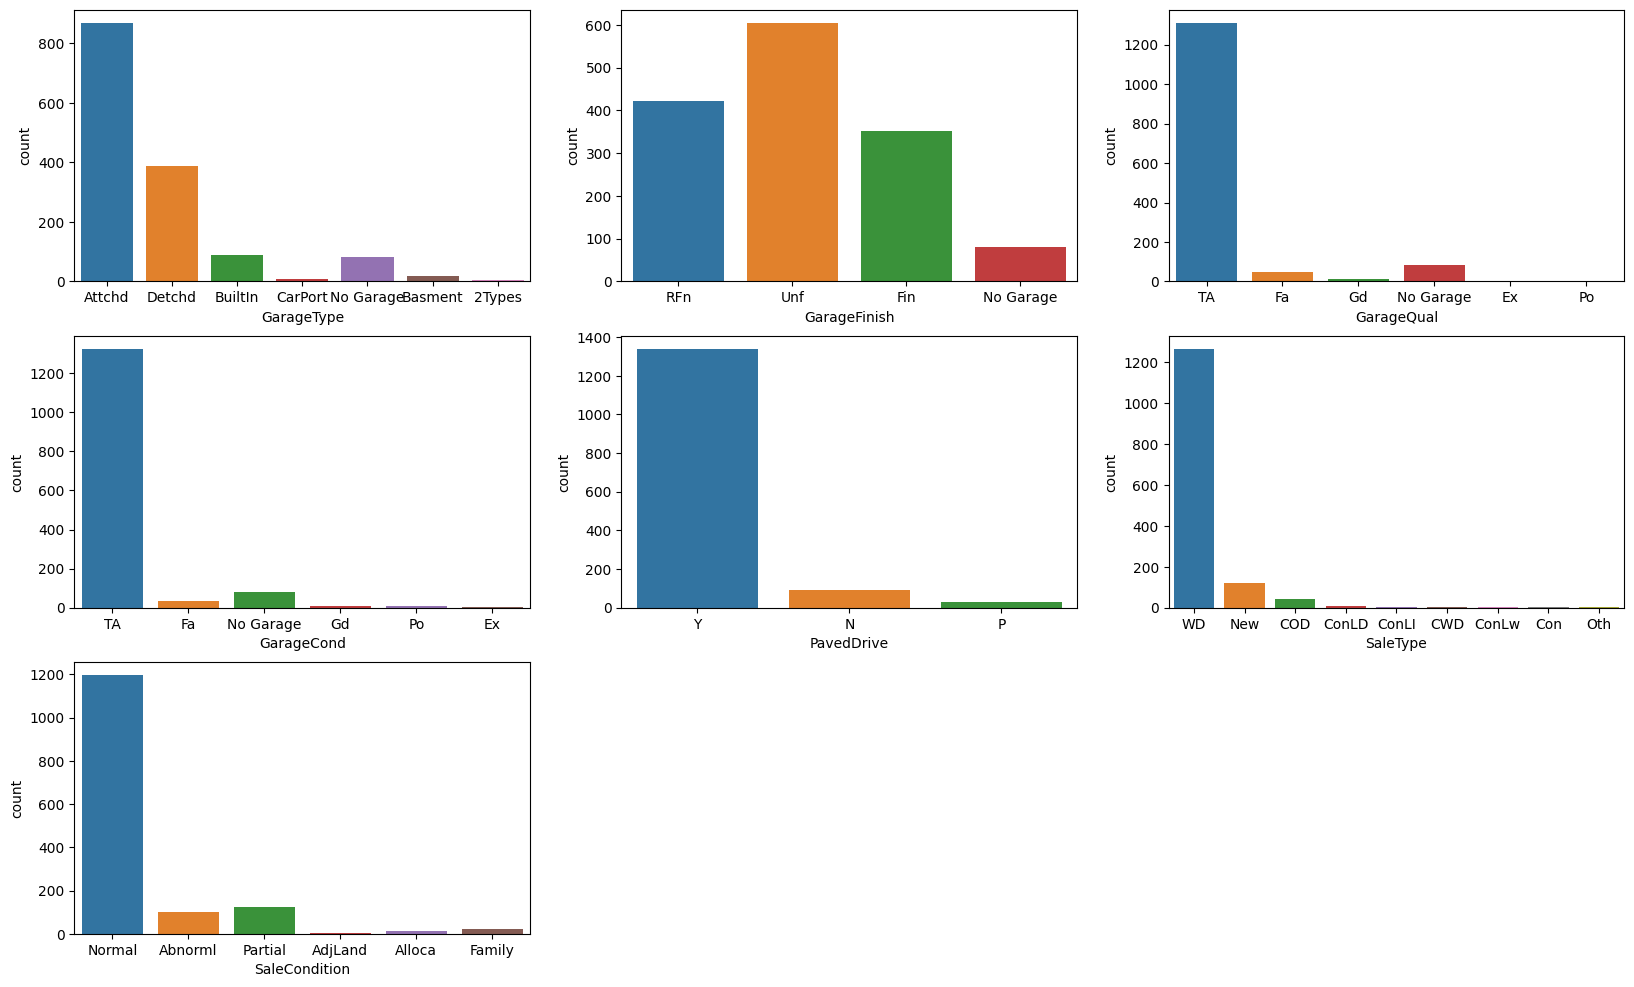

In [226]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.countplot(x='GarageType',data=housing_df)
plt.subplot(3,3,2)
sns.countplot(x='GarageFinish',data=housing_df)
plt.subplot(3,3,3)
sns.countplot(x='GarageQual',data=housing_df)
plt.subplot(3,3,4)
sns.countplot(x='GarageCond',data=housing_df)
plt.subplot(3,3,5)
sns.countplot(x='PavedDrive',data=housing_df)
plt.subplot(3,3,6)
sns.countplot(x='SaleType',data=housing_df)
plt.subplot(3,3,7)
sns.countplot(x='SaleCondition',data=housing_df)
plt.show()

In [227]:
# getting numeric columns
continuous_columns = housing_df.select_dtypes(include=['int64','float64'])
numeric = continuous_columns.columns
numeric

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

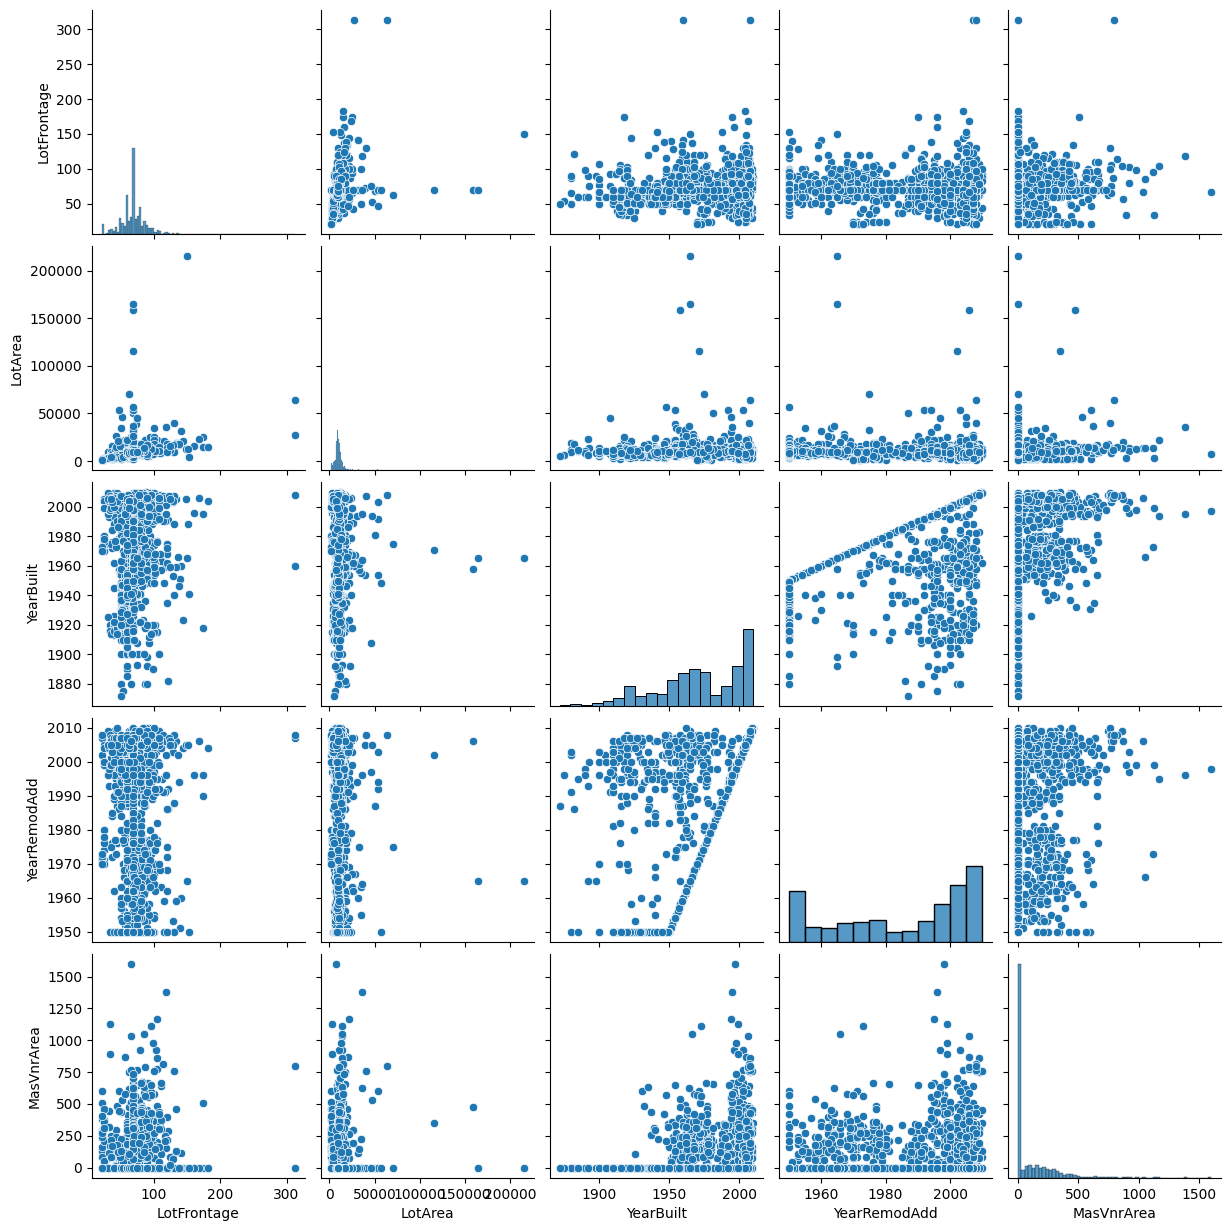

In [228]:
# visualizing numeric columns
sns.pairplot(data=housing_df,vars=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea'])
plt.show()

In [229]:
numeric

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

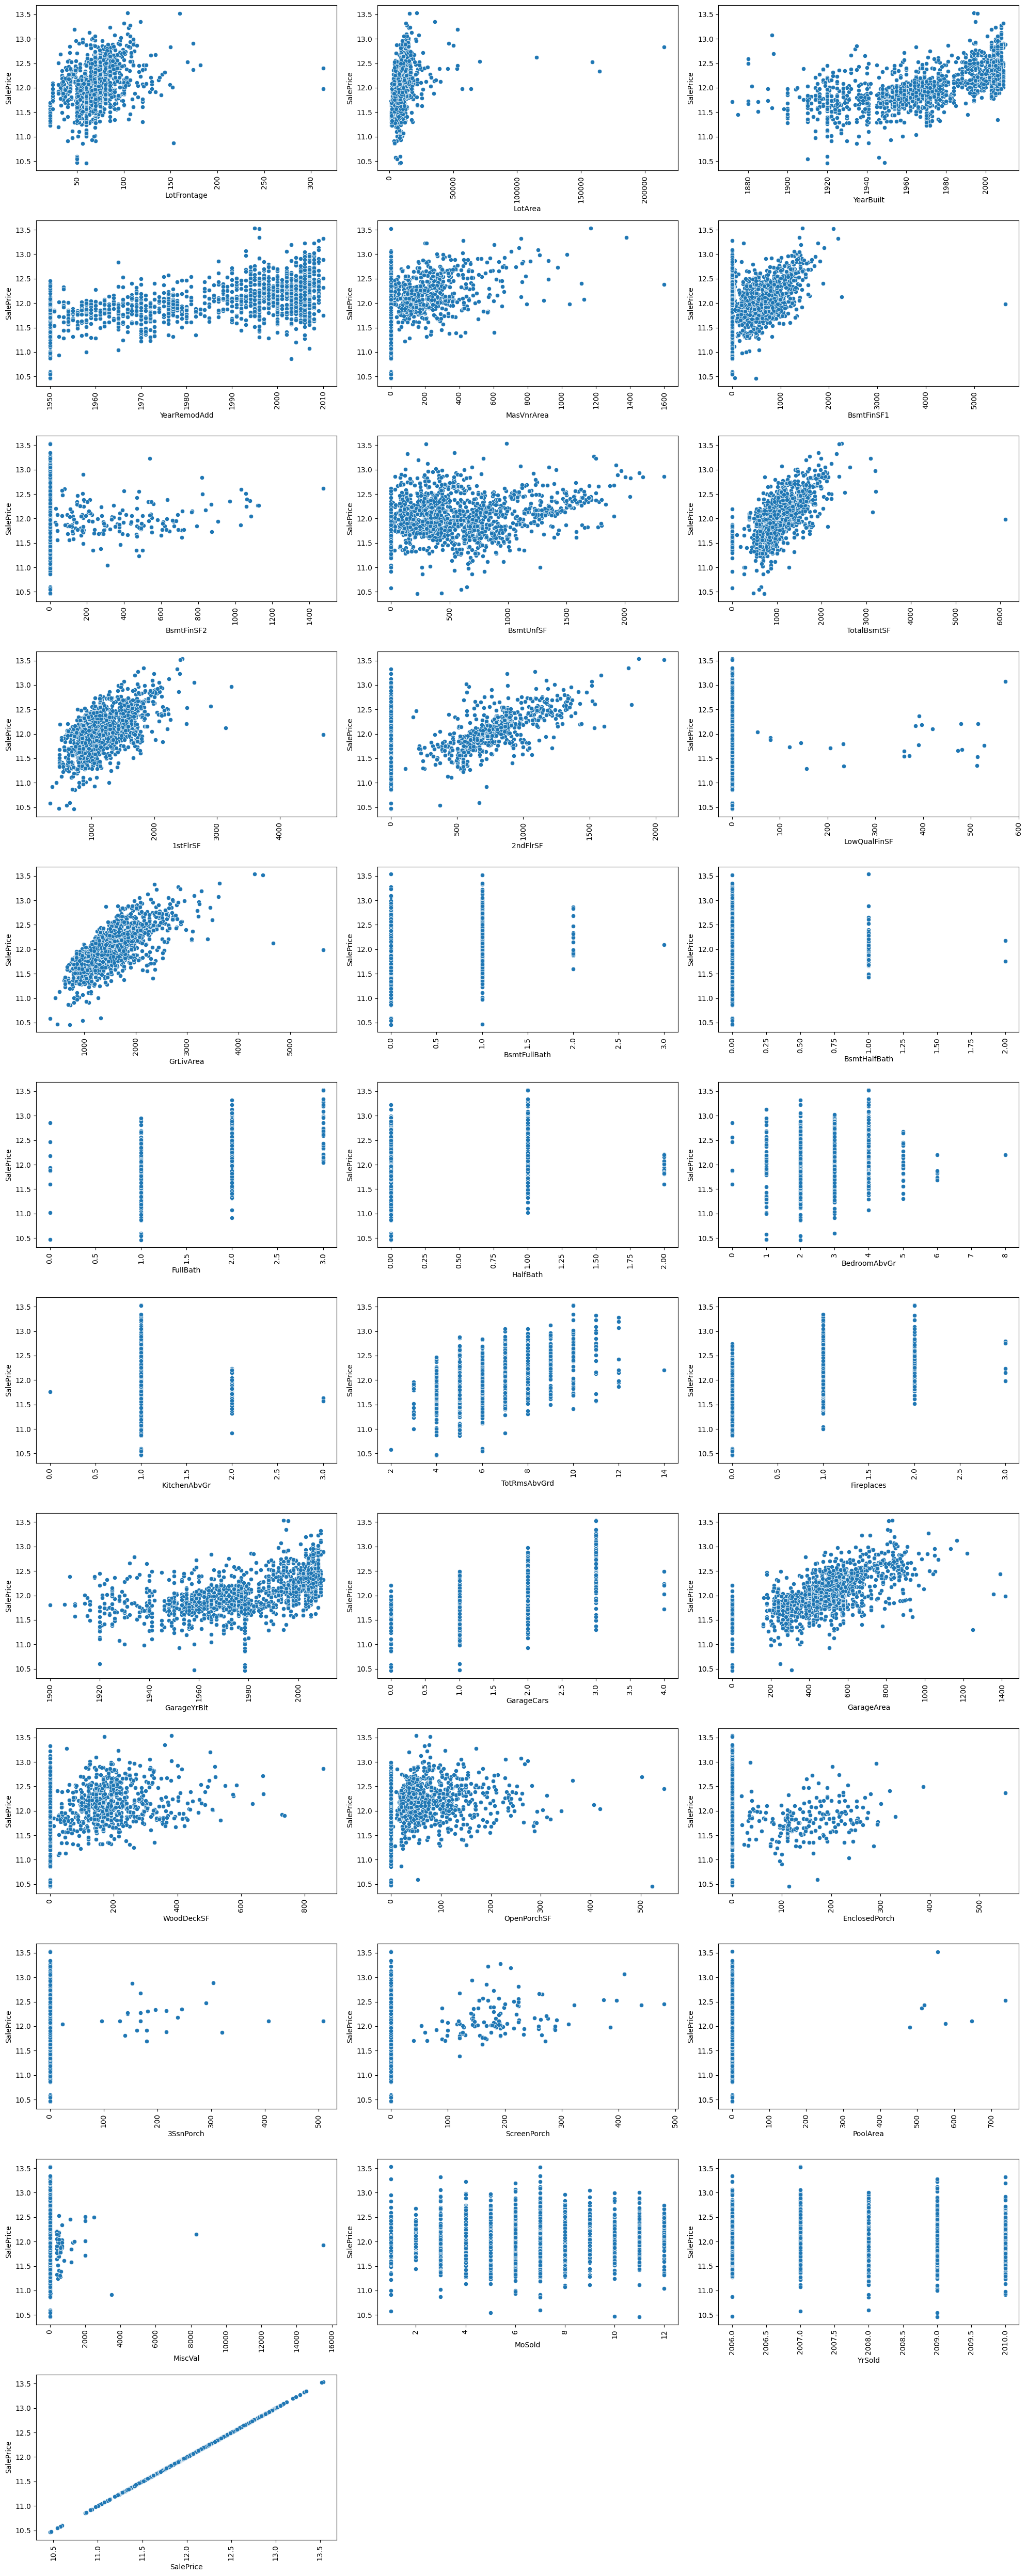

In [230]:
plt.figure(figsize=(20,50))
i=1
for x in numeric:
    plt.subplot(len(numeric)//3+1,3,i)
    sns.scatterplot( x=x, y='SalePrice', data=housing_df)
    plt.xticks(rotation = 'vertical')
    i += 1
plt.tight_layout()
plt.show()

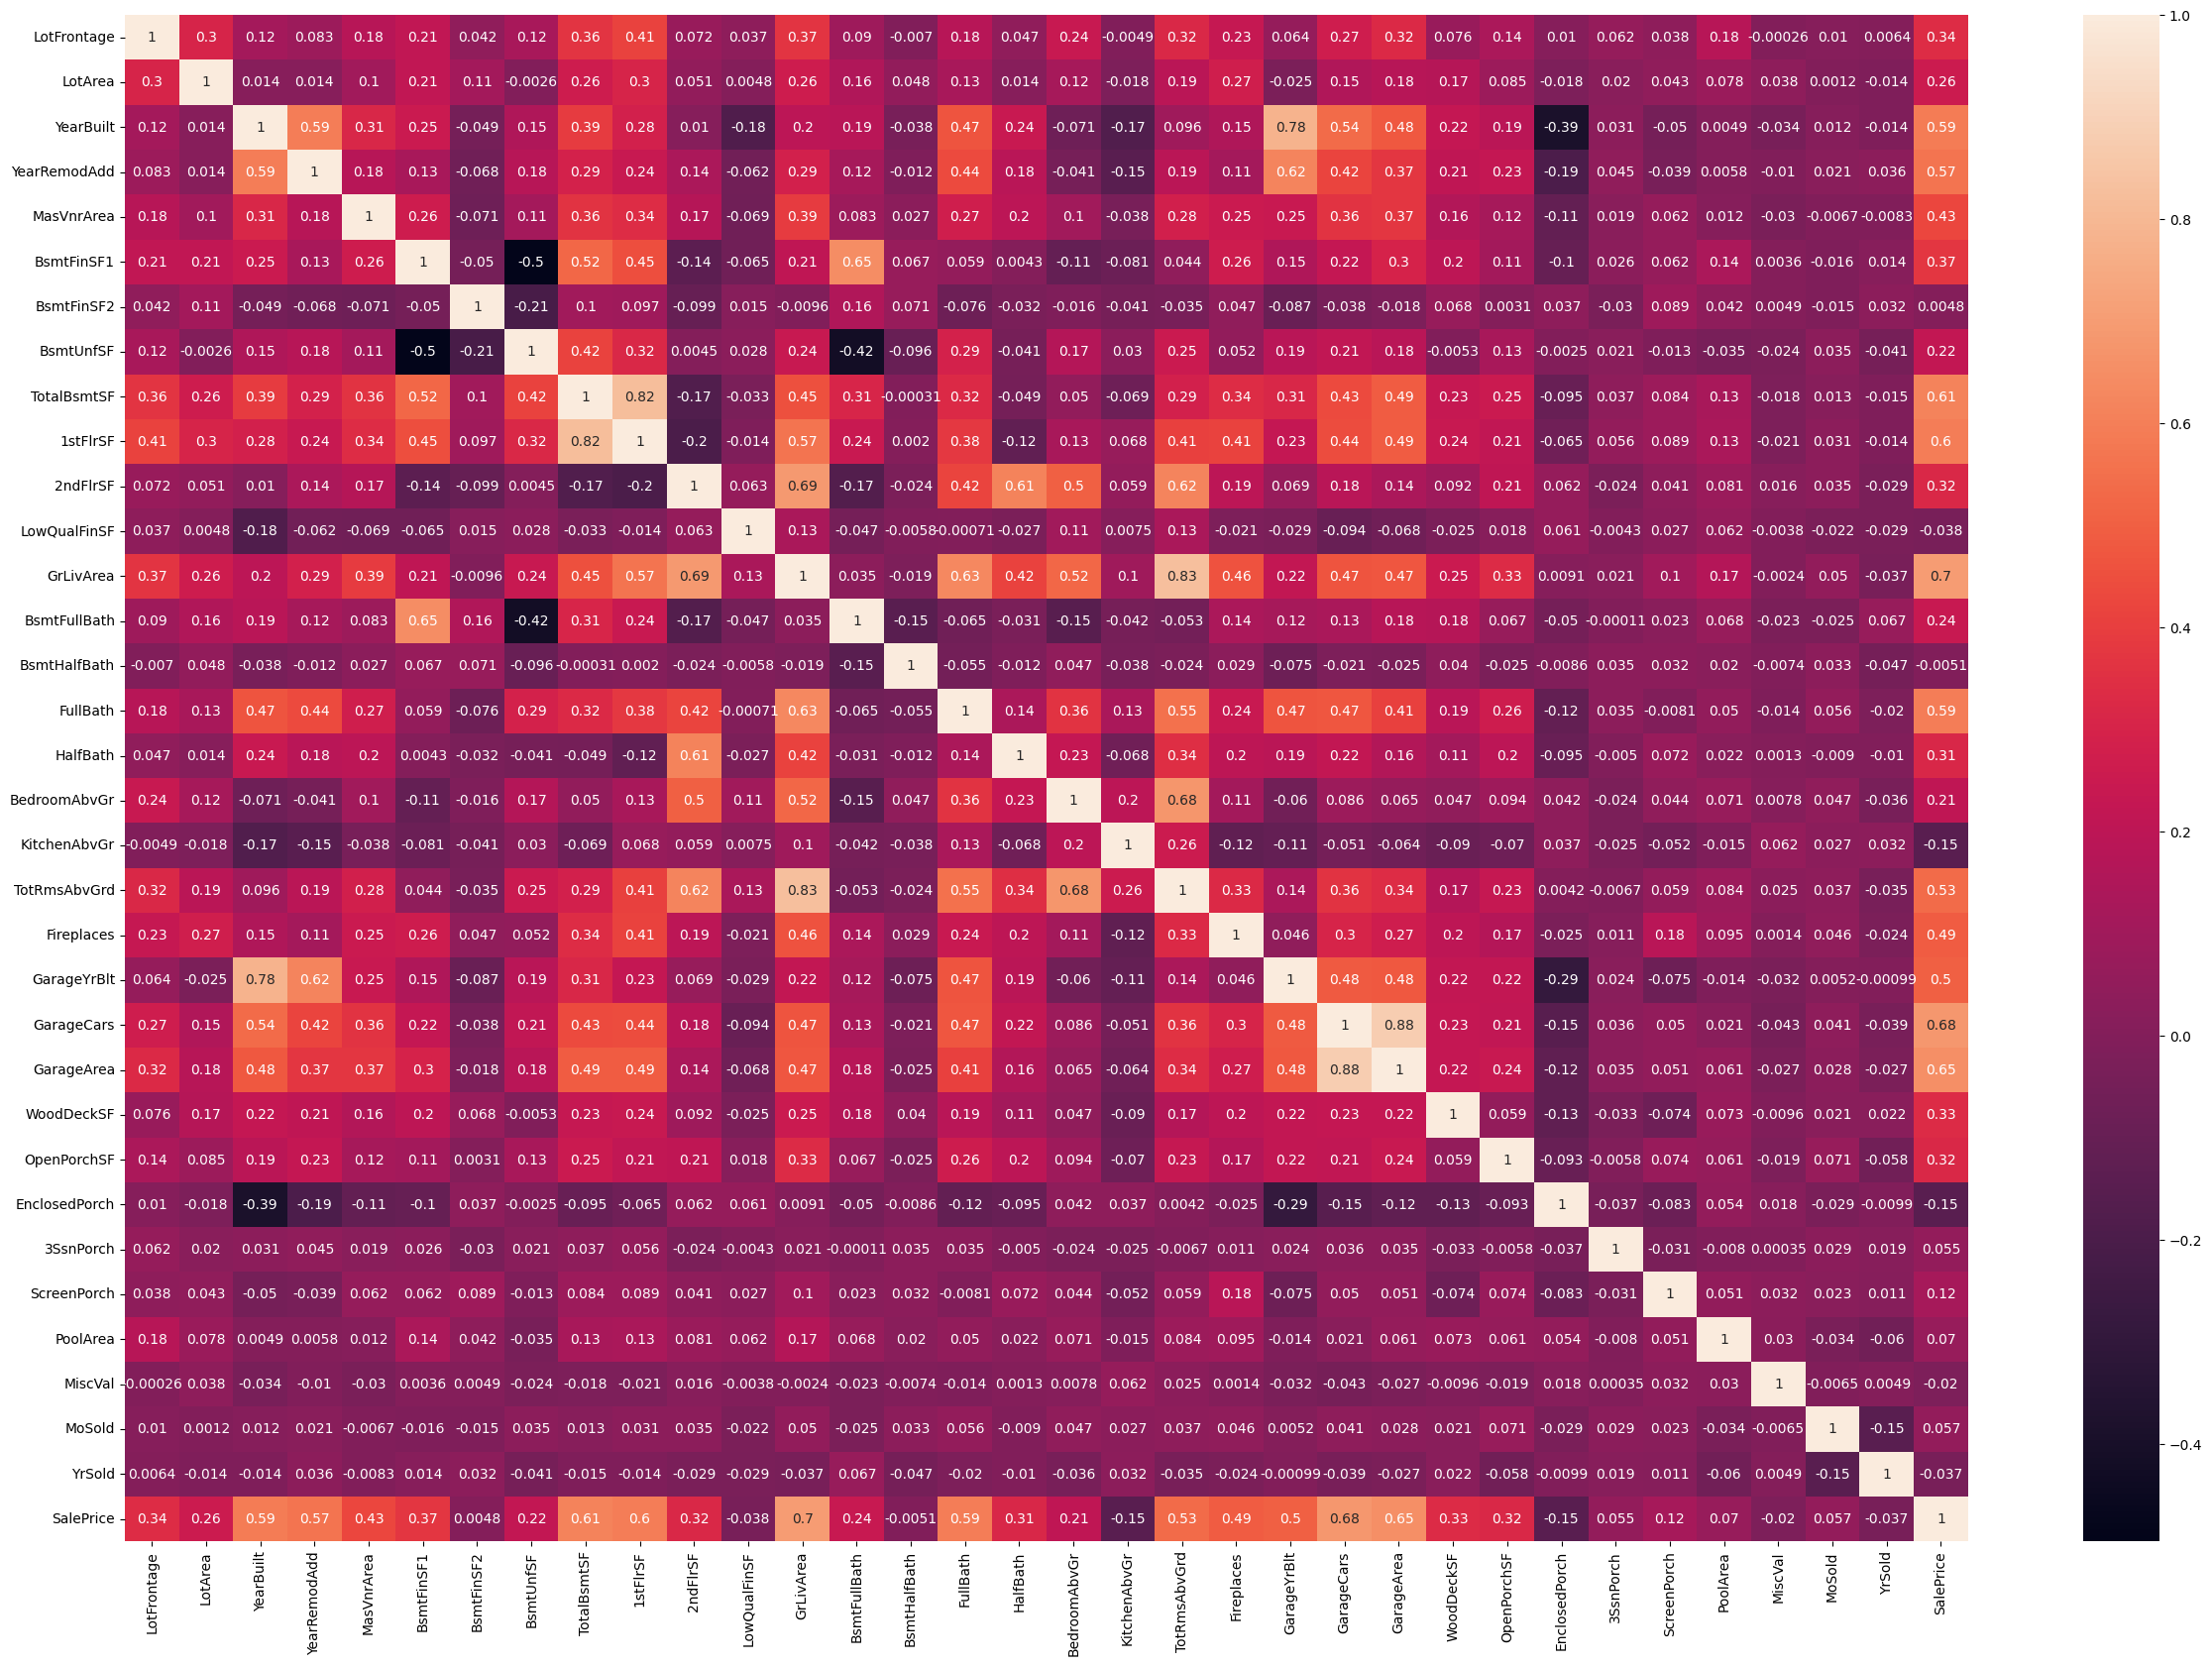

In [231]:
# heatmap
plt.figure(figsize=(30,20))
sns.heatmap(housing_df[numeric].corr(), annot=True)
plt.show()

#### Variables that are highly correlated with Sale Price are : GrLivArea, GarageArea, TotBsmtSF, 1stFlrSF,TotalRmsAbvGrd,FullBath and YearBuilt
#### GarageCars and GarageArea are highly correlated with a correlation of 0.88
#### TotRmsAbvGrd and GrLivArea are correlated to each other with a correlation of 0.83
#### 1stFlrSF and TotalBsmtSF are highly correlated with a correlation of 0.82

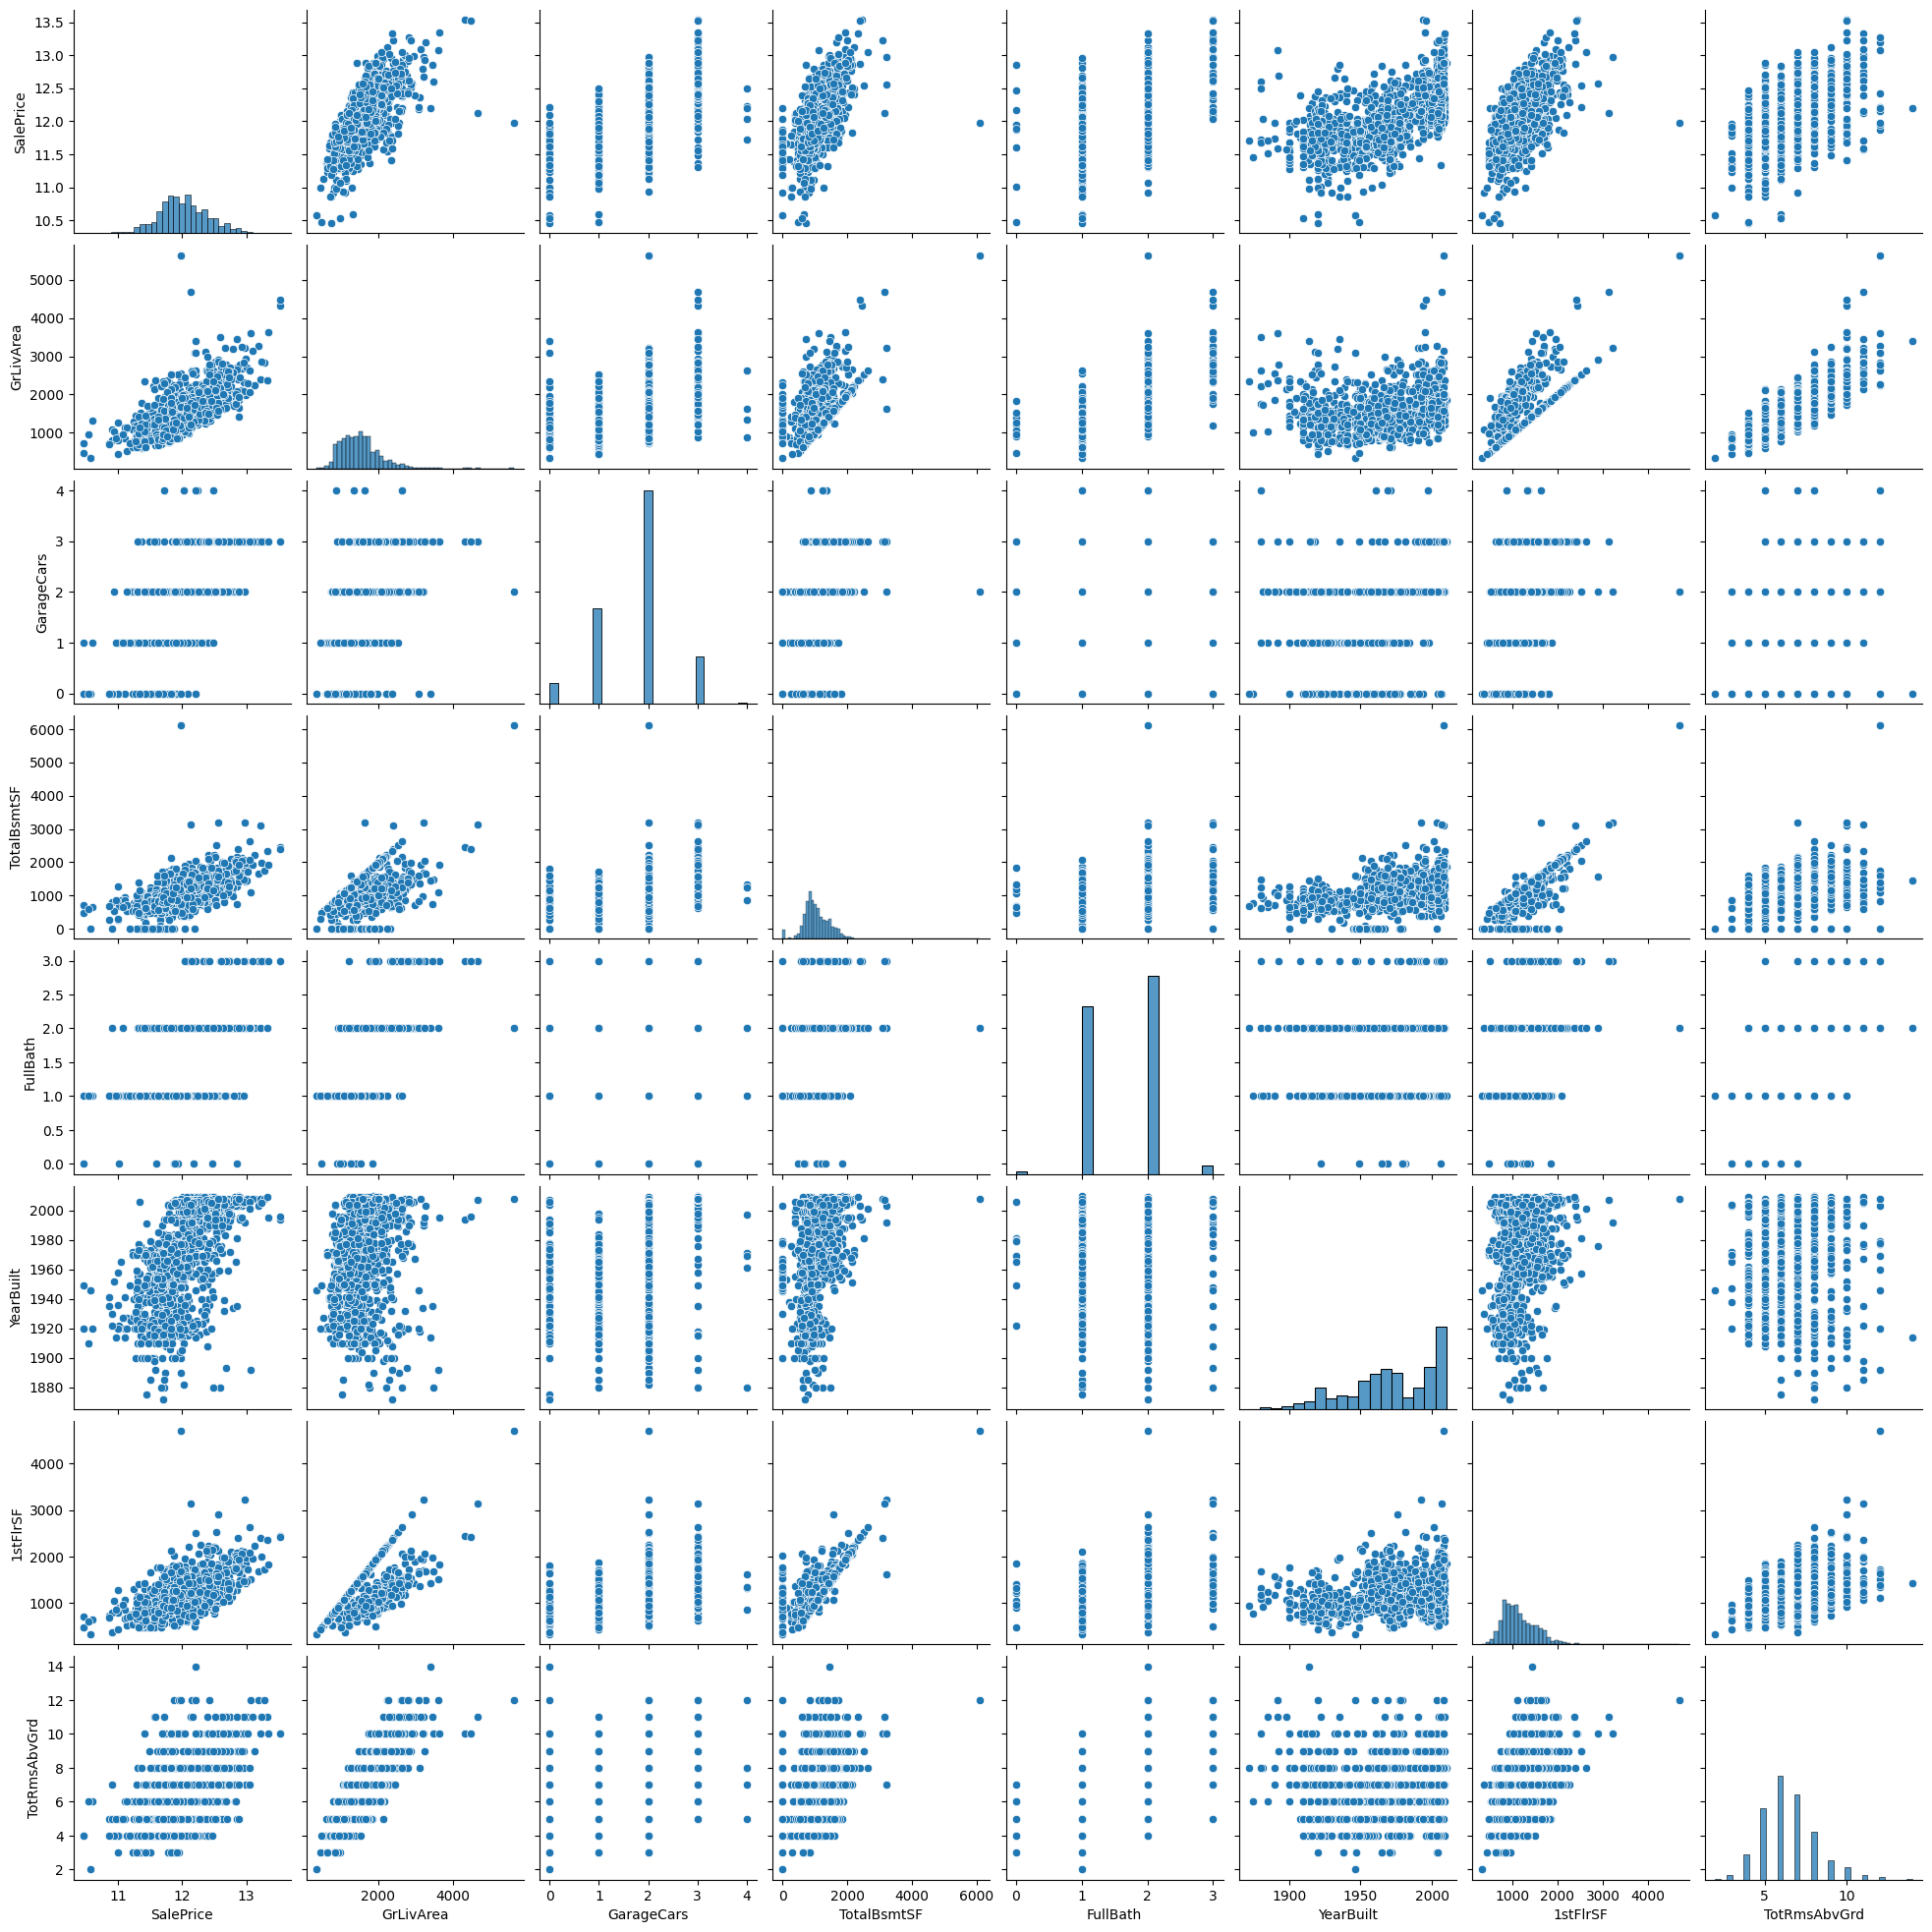

In [232]:
columns=['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF','TotRmsAbvGrd',]
sns.pairplot(housing_df[columns])
plt.show()

### Step-4 Data Preparation

#### encoding of variable(dummy variables)
#### train-test-split
#### feature scaling

In [233]:
y = housing_df.pop('SalePrice')
X = housing_df

In [234]:
# Dummy variable creation
housing_cat = X.select_dtypes(include=['object'])
housing_cat.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle    OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story           Good     Average     Gable  CompShg     VinylSd   
1     1Story  Above Average   Very Good     Gable  CompShg     MetalSd   
2     2Story           Good     Average     Gable  CompShg     VinylSd   
3     2Story           Good     Average     Gable  CompShg     Wd Sdng   
4     2Story      Very Good     Average     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1     MetalSd       None        TA        TA     CBlock       Gd       TA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3     Wd Shng       None        TA        TA     BrkTil       TA       Gd   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          Gd        Typ     Attchd          RFn         TA   
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

In [235]:
# creating dummy variables
housing_dummy = pd.get_dummies(housing_cat, drop_first=True)
housing_dummy.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   MSSubClass_DUPLEX - ALL STYLES AND AGES  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSSubClass_SPLIT FOYER  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0   
4                                                  0                        0   

   MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                                0            0            0            1   
1                                0            0            0            1   
2                                0            0            0            1   
3                                0            0            0            1   
4                                0            0            0            1   

   MSZoning_RM  Stree

In [236]:
X = pd.concat([X,housing_dummy], axis=1)
X.head()
X.shape

(1460, 310)

In [237]:
# dropping categorical columns as we have created dummy variables
X = X.drop(categorical, axis=1)
X.shape

(1460, 269)

In [238]:
X.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace=True)
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0          0            0         0        0       2   
1          0            0         0        0       5   
2          0            0         0        0       9   
3          0            0         0        0       2   
4          0            0         0        0      12   

   MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                     

In [239]:
#### Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [240]:
# Scaling
scaler = MinMaxScaler()
X_train[['LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold']])

In [241]:
len(X_train.columns)

265

In [242]:
# we can see that these columns are scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step-5 Model Evaluation

#### Multiple Linear Regression using RFE(recursive feature elimination)

In [243]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [244]:
# running RFE and taking top  feature for our model building:
num_features_to_select = 90
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X_train,y_train)

In [245]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 157),
 ('LotArea', False, 173),
 ('MasVnrArea', False, 170),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 73),
 ('BsmtHalfBath', False, 148),
 ('FullBath', False, 91),
 ('HalfBath', False, 129),
 ('BedroomAbvGr', False, 160),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 153),
 ('Fireplaces', False, 89),
 ('GarageCars', False, 31),
 ('GarageArea', False, 165),
 ('WoodDeckSF', False, 168),
 ('OpenPorchSF', False, 167),
 ('EnclosedPorch', False, 171),
 ('3SsnPorch', False, 163),
 ('ScreenPorch', False, 164),
 ('PoolArea', False, 161),
 ('MiscVal', False, 172),
 ('MoSold', False, 169),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', True, 1),
 ('MSSubClass_1-STORY PUD (Planne

In [246]:
# columns that are significant according to rfe
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_Somerst',

#### Ridge Model

In [247]:
X_train = X_train[col]
X_test = X_test[col]

In [249]:
params = {'alpha': [0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring= 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train_final, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [250]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.01}
-0.13114877775272632


In [251]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<= 100]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009653      0.003783         0.004151        0.000636       0.001   
1       0.007012      0.000358         0.003926        0.000177        0.01   
2       0.008694      0.001429         0.005284        0.001314         0.1   
3       0.009789      0.003106         0.005194        0.002085         1.0   
4       0.006558      0.000309         0.003923        0.000116         5.0   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.120060          -0.141207          -0.130776   
1   {'alpha': 0.01}          -0.120372          -0.141171          -0.130539   
2    {'alpha': 0.1}          -0.123067          -0.140871          -0.130628   
3    {'alpha': 1.0}          -0.131806          -0.142764          -0.136801   
4    {'alpha': 5.0}          -0.147599          -0.157166          -0.152352   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.143713          -0.121106        -0.131373        0.009826   
1          -0.142161          -0.121500        -0.131149        0.009288   
2          -0.136238          -0.126469        -0.131455        0.006441   
3          -0.136674          -0.137285        -0.137066        0.003476   
4          -0.149783          -0.153995        -0.152179        0.003314   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.119238           -0.118947   
1                1           -0.119713           -0.118970   
2                3           -0.123830           -0.119286   
3                4           -0.134747           -0.123821   
4                5           -0.151747           -0.142636   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.119732           -0.118129           -0.119770   
1           -0.120232           -0.118537           -0.120225   
2           -0.124330           -0.122117           -0.123978   
3           -0.134032           -0.133082           -0.134588   
4           -0.150341           -0.150206           -0.151834   

   mean_train_score  std_train_score  
0         -0.119163         0.000602  
1         -0.119535         0.000679  
2         -0.122708         0.001874  
3         -0.132054         0.004157  
4         -0.149353         0.003427

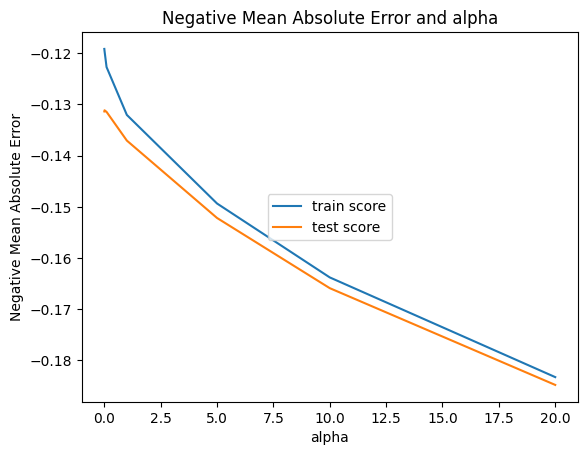

In [252]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='center')
plt.show()

In [253]:
model_cv.best_params_

{'alpha': 0.01}

In [254]:
# Ridge expression
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [255]:
ridge.coef_

array([ 1.22576454e-04,  3.21910589e-05,  2.31806328e-05,  1.77841810e-04,
        1.05817542e-04,  1.24391084e-04, -5.30566054e-05,  1.77399873e-04,
       -1.75938030e-01,  3.61232185e-01,  2.58053297e-01,  4.36507021e-01,
        4.76813300e-01,  2.82804200e-01,  1.98115495e-01,  1.56772784e-01,
        3.91191779e-01,  5.10861473e-01,  3.55307013e-01,  2.16997846e-01,
        4.39531993e-01,  4.53352448e-01,  4.85649560e-01,  4.90273908e-01,
        5.10107702e-01,  4.93972714e-01,  4.45412412e-01,  1.62155225e-01,
        1.33098465e-01, -1.86356938e-01,  1.01123978e-01,  1.29742033e-01,
        4.25774541e-01,  4.07998350e-01,  2.41654714e-01, -1.51209187e+00,
        3.20953868e-01,  4.90244108e-01,  1.98115495e-01,  2.16997846e-01,
        4.12752796e-01,  2.27864333e-01,  4.03590942e-01,  1.40944717e-01,
       -2.08482910e-01,  3.76643857e-01,  2.46430645e-01, -1.01814165e-01,
        1.13304637e-01, -2.24111252e-01, -1.01814165e-01,  4.25532305e-01,
        3.23870257e+00,  

In [256]:
ridge.score(X_train,y_train)

0.916103087759401

In [257]:
ridge.score(X_test,y_test)

0.8031090564043477

In [ ]:
### Model using lasso

In [258]:
X_train_lasso = X_train[col]
X_test_lasso = X_test[col]

In [259]:
folds = 10

params = {'alpha': [0.0001, 0.001,0.002,0.003,0.005,0.008]}
lasso = Lasso()
model_x = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_x.fit(X_train_lasso, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.008]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [260]:
print(model_x.best_params_)
print(model_x.best_score_)

{'alpha': 0.0001}
-0.10637464611765628


In [261]:
cv_results = pd.DataFrame(model_x.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.051108      0.008020         0.003571        0.000484      0.0001   
1       0.015606      0.006454         0.003491        0.000399       0.001   
2       0.012974      0.002131         0.003641        0.000752       0.002   
3       0.030499      0.001935         0.008296        0.000557       0.003   
4       0.027230      0.004596         0.008391        0.000485       0.005   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.111128          -0.093081          -0.088745   
1   {'alpha': 0.001}          -0.117748          -0.100530          -0.096438   
2   {'alpha': 0.002}          -0.119913          -0.103652          -0.100225   
3   {'alpha': 0.003}          -0.119879          -0.105221          -0.104353   
4   {'alpha': 0.005}          -0.121040          -0.106772          -0.112943   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.136030          -0.103173          -0.121217          -0.121215   
1          -0.137491          -0.122527          -0.126282          -0.102585   
2          -0.144329          -0.127293          -0.127661          -0.101948   
3          -0.149526          -0.130168          -0.128190          -0.106363   
4          -0.159737          -0.131540          -0.131433          -0.113276   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.104948          -0.089312          -0.094899        -0.106375   
1          -0.107181          -0.100725          -0.104170        -0.111568   
2          -0.107943          -0.102105          -0.105545        -0.114061   
3          -0.105840          -0.103070          -0.107849        -0.116046   
4          -0.106083          -0.109939          -0.118385        -0.121115   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.015051                1           -0.089713           -0.090991   
1        0.012922                2           -0.106091           -0.107712   
2        0.014177                3           -0.109770           -0.111620   
3        0.014731                4           -0.111845           -0.113584   
4        0.015489                5           -0.117444           -0.118900   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.091553           -0.087888           -0.090767   
1           -0.107601           -0.097332           -0.105216   
2           -0.111145           -0.103256           -0.109099   
3           -0.113369           -0.106259           -0.111439   
4           -0.118403           -0.113506           -0.115938   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.090836           -0.089943           -0.090868   
1           -0.104409           -0.106417           -0.106391   
2           -0.107029           -0.111030           -0.110115   
3           -0.109631           -0.113643           -0.112436   
4           -0.115915           -0.118422           -0.118487   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.091036           -0.091092         -0.090469         0.001002  
1           -0.107468           -0.106757         -0.105539         0.002911  
2           -0.111531           -0.110603         -0.109520         0.002461  
3           -0.113619           -0.112908         -0.111873         0.002224  
4           -0.119603           -0.118866         -0.117548         0.001782

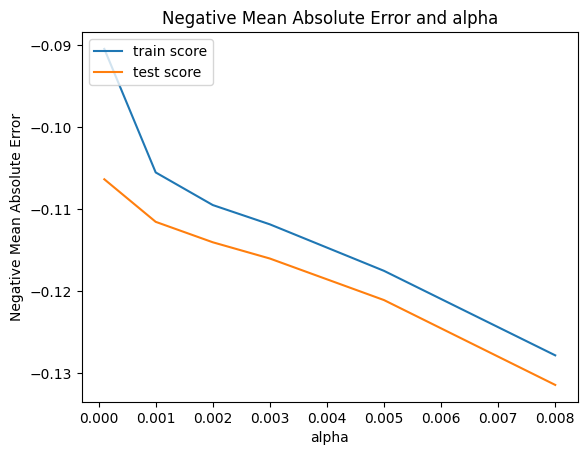

In [262]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [263]:
alpha =0.008

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.008)

In [264]:
(lasso.coef_)

array([ 1.82418299e-04,  1.21833446e-04,  1.26623977e-04,  7.24024303e-05,
        3.08257846e-04,  2.86625345e-04, -2.90913081e-04,  3.46165866e-05,
       -3.48586199e-02, -5.09891213e-03, -3.93936387e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  4.27814521e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -7.31063537e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.25824685e-01,  1.16096057e-01,
       -0.00000000e+00,  0.00000000e+00,  2.02459984e-01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [265]:
Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train_lasso, Y_train_lasso)

y_train_pred = lasso.predict(X_train_lasso)
print(model_lasso.score(X_train_lasso, Y_train_lasso))
print(metrics.r2_score(y_true=Y_train_lasso, y_pred=y_train_pred))

0.7541090893381499
0.7541090893381499


In [266]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_lasso.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

lasso_df.head(20)

Coeff Values                                 Variables  \
46      0.202460                     OverallQual_Very Good   
73      0.150301                              CentralAir_Y   
42      0.125825                     OverallQual_Excellent   
43      0.116096                          OverallQual_Good   
26     -0.073106                               MSZoning_RM   
86      0.059559                             GarageCond_TA   
17      0.042781           MSSubClass_2-STORY 1946 & NEWER   
8      -0.034859                              KitchenAbvGr   
88      0.031413                              SaleType_New   
81      0.029335                             GarageQual_TA   
9      -0.005099  MSSubClass_1-1/2 STORY FINISHED ALL AGES   
10     -0.003939           MSSubClass_1-STORY 1945 & OLDER   
4       0.000308                                  1stFlrSF   
6      -0.000291                              LowQualFinSF   
5       0.000287                                  2ndFlrSF   
0       0.000182                                BsmtFinSF1   
2       0.000127                                 BsmtUnfSF   
1       0.000122                                BsmtFinSF2   
3       0.000072                               TotalBsmtSF   
7       0.000035                                 GrLivArea   

    Absolute Coefficent  
46             0.202460  
73             0.150301  
42             0.125825  
43             0.116096  
26             0.073106  
86             0.059559  
17             0.042781  
8              0.034859  
88             0.031413  
81             0.029335  
9              0.005099  
10             0.003939  
4              0.000308  
6              0.000291  
5              0.000287  
0              0.000182  
2              0.000127  
1              0.000122  
3              0.000072  
7              0.000035

In [268]:
### these are the variables selected by lasso
